# Dengue Prediction System by using Machine Learning For SriLanka

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import pandas as pd

In [118]:
dengue_dataset = pd.read_csv("DataSet.csv")
dengue_dataset.head()

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_48972\4250884915.py:1: DtypeWarning: Columns (132) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue_dataset = pd.read_csv("DataSet.csv")


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [120]:
len(dengue_dataset)

4920

In [4]:
training_set.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze  prognosis  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  

[5 rows x 133 columns]

In [5]:
#test_set.to_csv("test_set.csv", index=False)
#print("test dataset file saved successfully.")

In [6]:
# Plot training dataset

<Figure size 640x480 with 0 Axes>

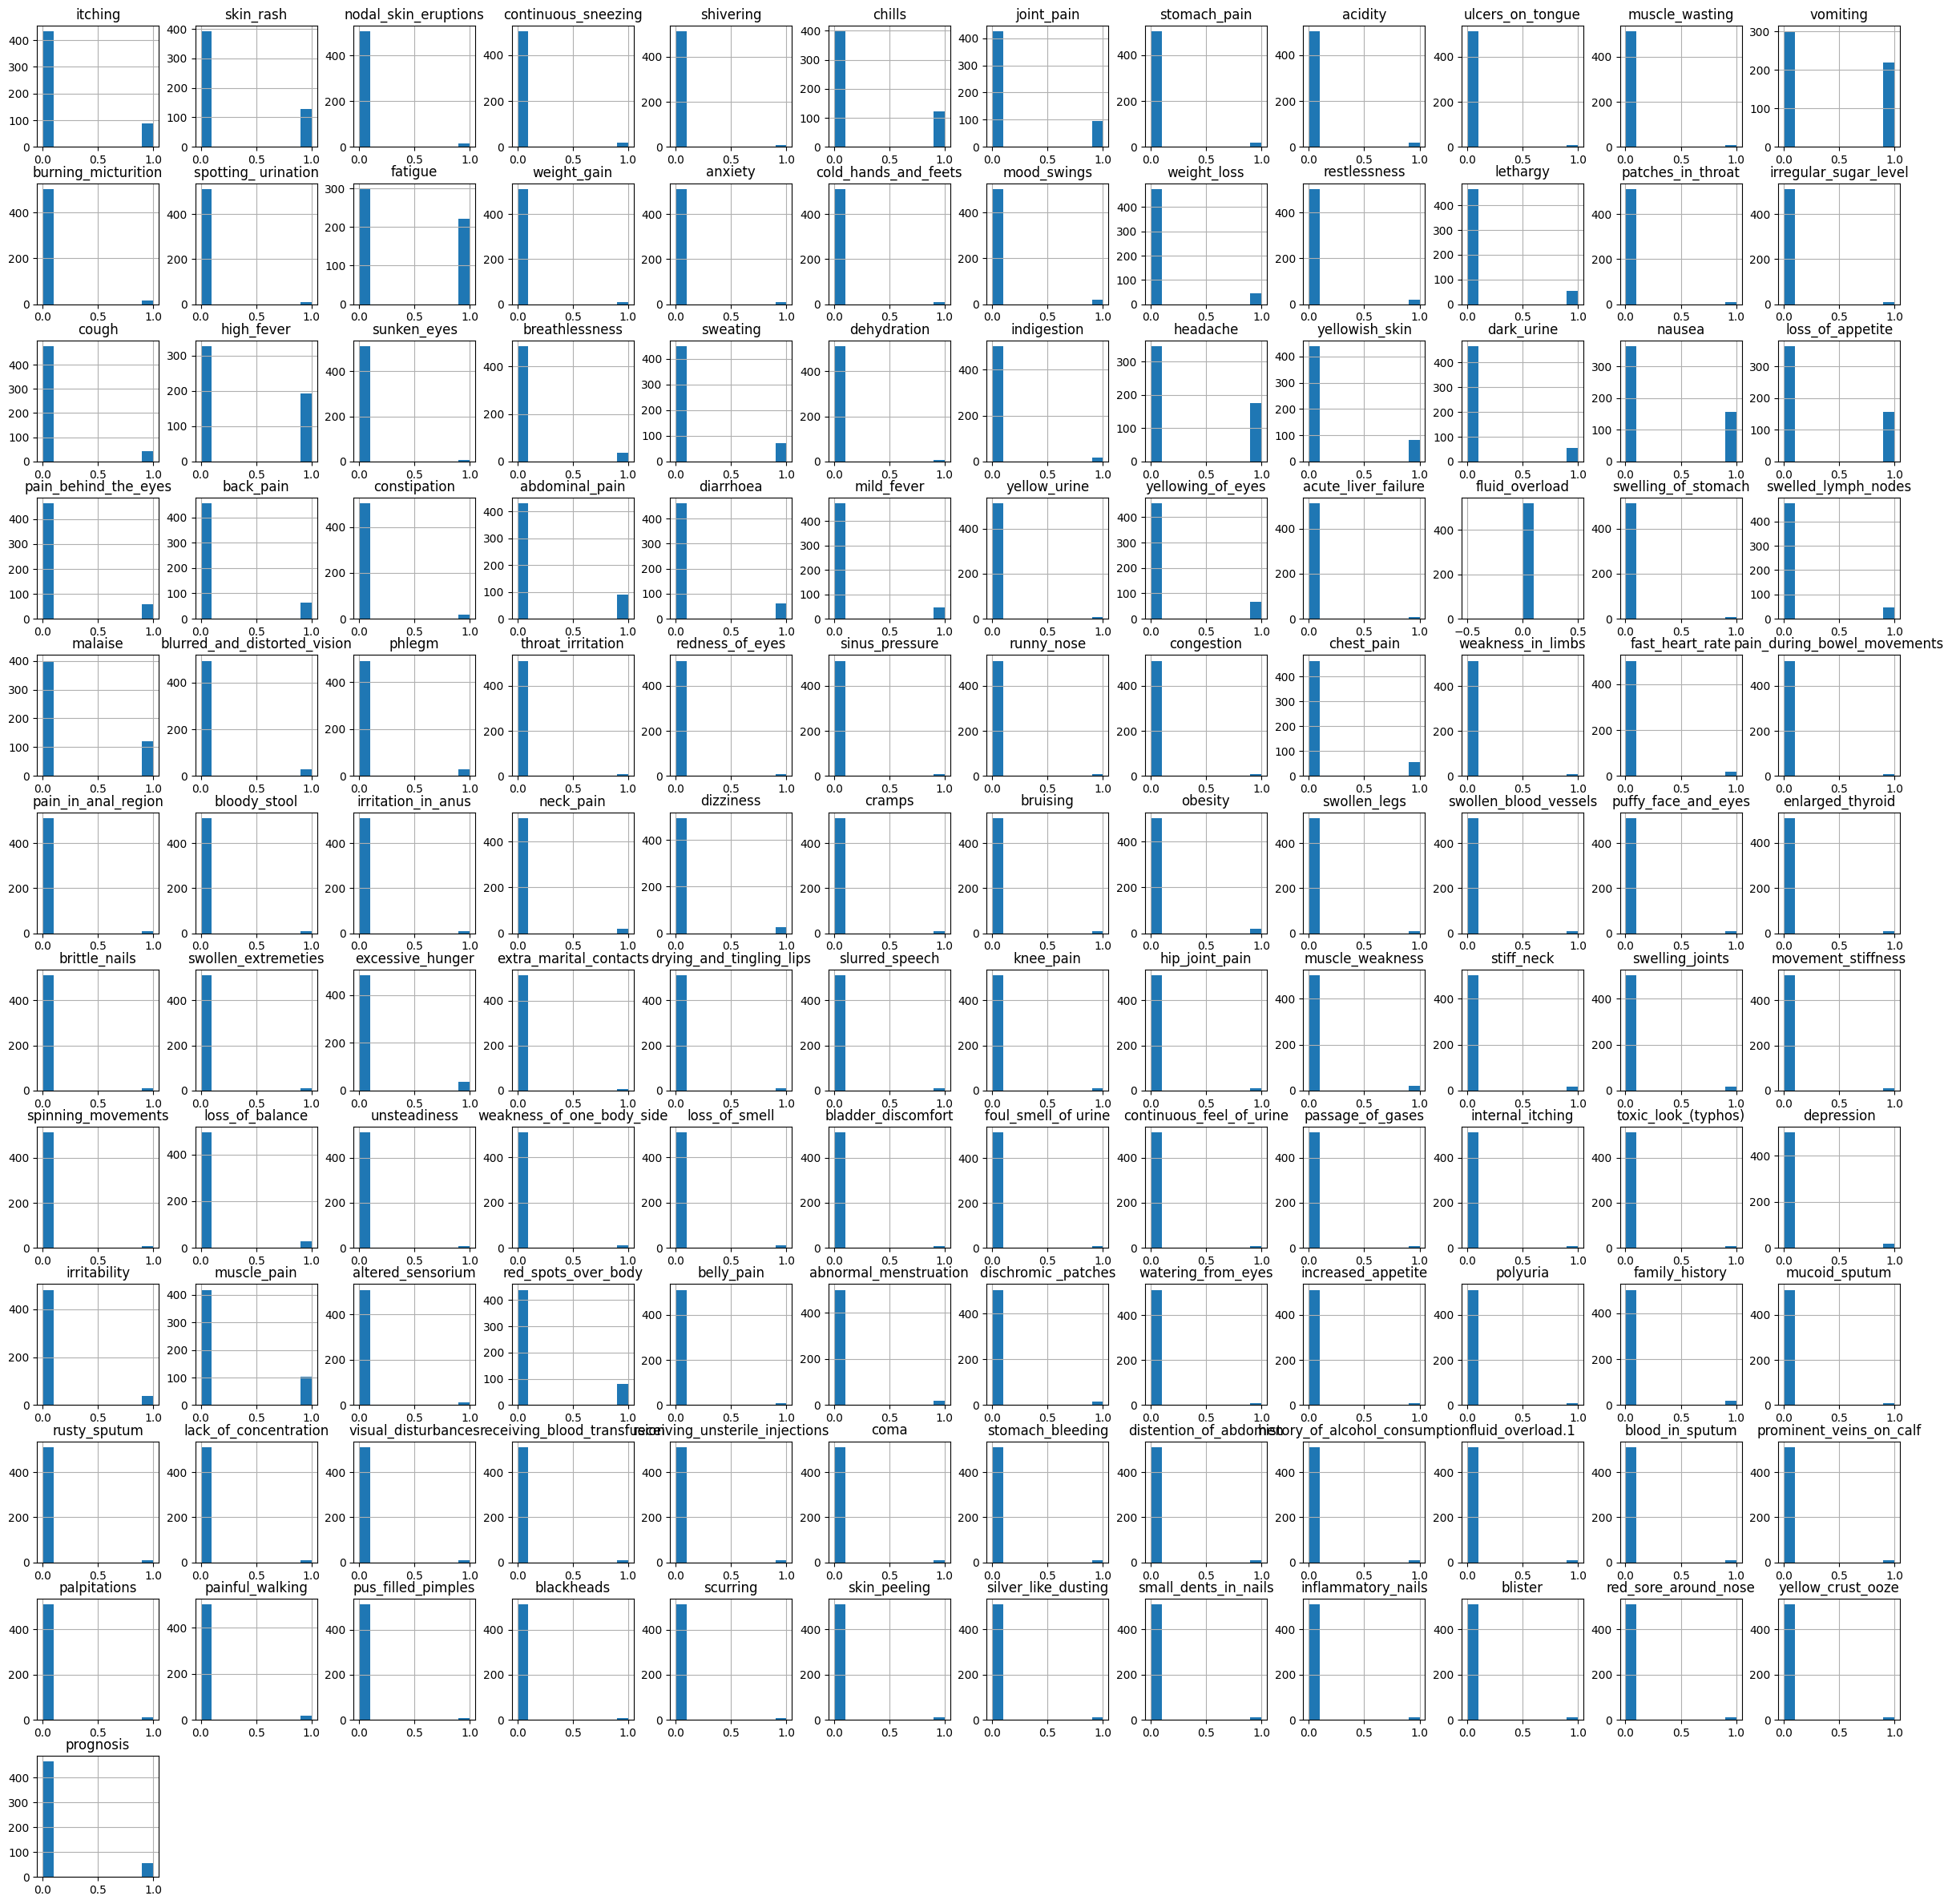

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=1.2, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)


training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [8]:
print(training_set.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis               int64
Length: 133, dtype: object


In [9]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 540.4 KB


In [10]:
training_set.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
training_set["prognosis"].value_counts()

prognosis
0    463
1     57
Name: count, dtype: int64

## Explotary Data Analysis (EDA)

In [12]:
### in order to this predict our objective is to predict the dengue is infected or not (classify the dengue infected or not)
    ### what attributes are so important for doing so
    ### to  do that we have to  do corrrelational analysis between the prognosis (dependent variable) (y)and other independent variables(x)

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [14]:
corr_matrix = training_set.corr()

In [15]:
corr_matrix

itching  skin_rash  nodal_skin_eruptions  \
itching                         1.000000   0.251387              0.275974   
skin_rash                       0.251387   1.000000              0.207063   
nodal_skin_eruptions            0.275974   0.207063              1.000000   
continuous_sneezing            -0.082974  -0.105596             -0.032756   
shivering                      -0.056417  -0.071799             -0.022272   
chills                         -0.251221   0.151788             -0.099175   
joint_pain                     -0.214759   0.334931             -0.084781   
stomach_pain                    0.118914   0.044636             -0.032756   
acidity                        -0.082974  -0.105596             -0.032756   
ulcers_on_tongue               -0.056417  -0.071799             -0.022272   
muscle_wasting                 -0.056417  -0.071799             -0.022272   
vomiting                       -0.137351  -0.086313             -0.152579   
burning_micturition             0.127478   0.052361             -0.031746   
spotting_ urination             0.235284   0.145267             -0.022272   
fatigue                         0.109975   0.127677             -0.153181   
weight_gain                    -0.059898  -0.076228             -0.023646   
anxiety                        -0.059898  -0.076228             -0.023646   
cold_hands_and_feets           -0.059898  -0.076228             -0.023646   
mood_swings                    -0.085464  -0.108765             -0.033739   
weight_loss                     0.152950  -0.176793             -0.054841   
restlessness                   -0.085464  -0.108765             -0.033739   
lethargy                        0.384358   0.154772             -0.060652   
patches_in_throat              -0.056417  -0.071799             -0.022272   
irregular_sugar_level          -0.059898  -0.076228             -0.023646   
cough                          -0.137222  -0.174634             -0.054171   
high_fever                      0.077906   0.240746             -0.136883   
sunken_eyes                    -0.056417  -0.071799             -0.022272   
breathlessness                 -0.121245  -0.154301             -0.047864   
sweating                       -0.179476  -0.228409             -0.070852   
dehydration                    -0.056417  -0.071799             -0.022272   
indigestion                    -0.082974  -0.105596             -0.032756   
headache                       -0.059197   0.300405             -0.126352   
yellowish_skin                  0.258710  -0.246727             -0.076534   
dark_urine                      0.249858  -0.195529             -0.060652   
nausea                         -0.205933   0.119512             -0.116642   
loss_of_appetite                0.150044   0.349660             -0.117177   
pain_behind_the_eyes           -0.158360   0.525343             -0.062516   
back_pain                      -0.170589   0.469539             -0.067344   
constipation                   -0.085464  -0.108765             -0.033739   
abdominal_pain                  0.224068  -0.264544             -0.082061   
diarrhoea                      -0.163003  -0.207445             -0.064349   
mild_fever                      0.287020   0.191633             -0.056165   
yellow_urine                    0.254717  -0.076228             -0.023646   
yellowing_of_eyes               0.089835  -0.219003             -0.067934   
acute_liver_failure            -0.059898  -0.076228             -0.023646   
fluid_overload                       NaN        NaN                   NaN   
swelling_of_stomach            -0.059898  -0.076228             -0.023646   
swelled_lymph_nodes             0.292873   0.197390             -0.055505   
malaise                         0.191023   0.456870             -0.097590   
blurred_and_distorted_vision   -0.105623  -0.134420             -0.041697   
phlegm                         -0.109688  -0.139593             -0.043302   
throat_irritation            

In [16]:
corr_matrix["prognosis"].sort_values(ascending=False)

prognosis                         1.000000
pain_behind_the_eyes              1.000000
back_pain                         0.928316
red_spots_over_body               0.726468
joint_pain                        0.642191
muscle_pain                       0.632779
malaise                           0.567548
chills                            0.543450
nausea                            0.535964
loss_of_appetite                  0.533520
skin_rash                         0.525343
headache                          0.494778
high_fever                        0.367521
vomiting                          0.334971
fatigue                           0.333406
foul_smell_of urine              -0.040986
weakness_in_limbs                -0.043859
spotting_ urination              -0.043859
extra_marital_contacts           -0.043859
muscle_wasting                   -0.043859
ulcers_on_tongue                 -0.043859
dehydration                      -0.043859
watering_from_eyes               -0.043859
sunken_eyes

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='back_pain', ylabel='prognosis'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>,
        <Axes: xlabel='joint_pain', ylabel='prognosis'>,
        <Axes: xlabel='loss_of_appetite', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='back_pain'>,
        <Axes: xlabel='back_pain', ylabel='back_pain'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='back_pain'>,
        <Axes: xlabel='joint_pain', ylabel='back_pain'>,
        <Axes: xlabel='loss_of_appetite', ylabel='back_pain'>],
       [<Axes: xlabel='prognosis', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='back_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='joint_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='loss_of_appetite', ylabel='pain_behind_the_eyes'>],
       [<Axes: xlabel='prognosis', ylabel='jo

<Figure size 640x480 with 0 Axes>

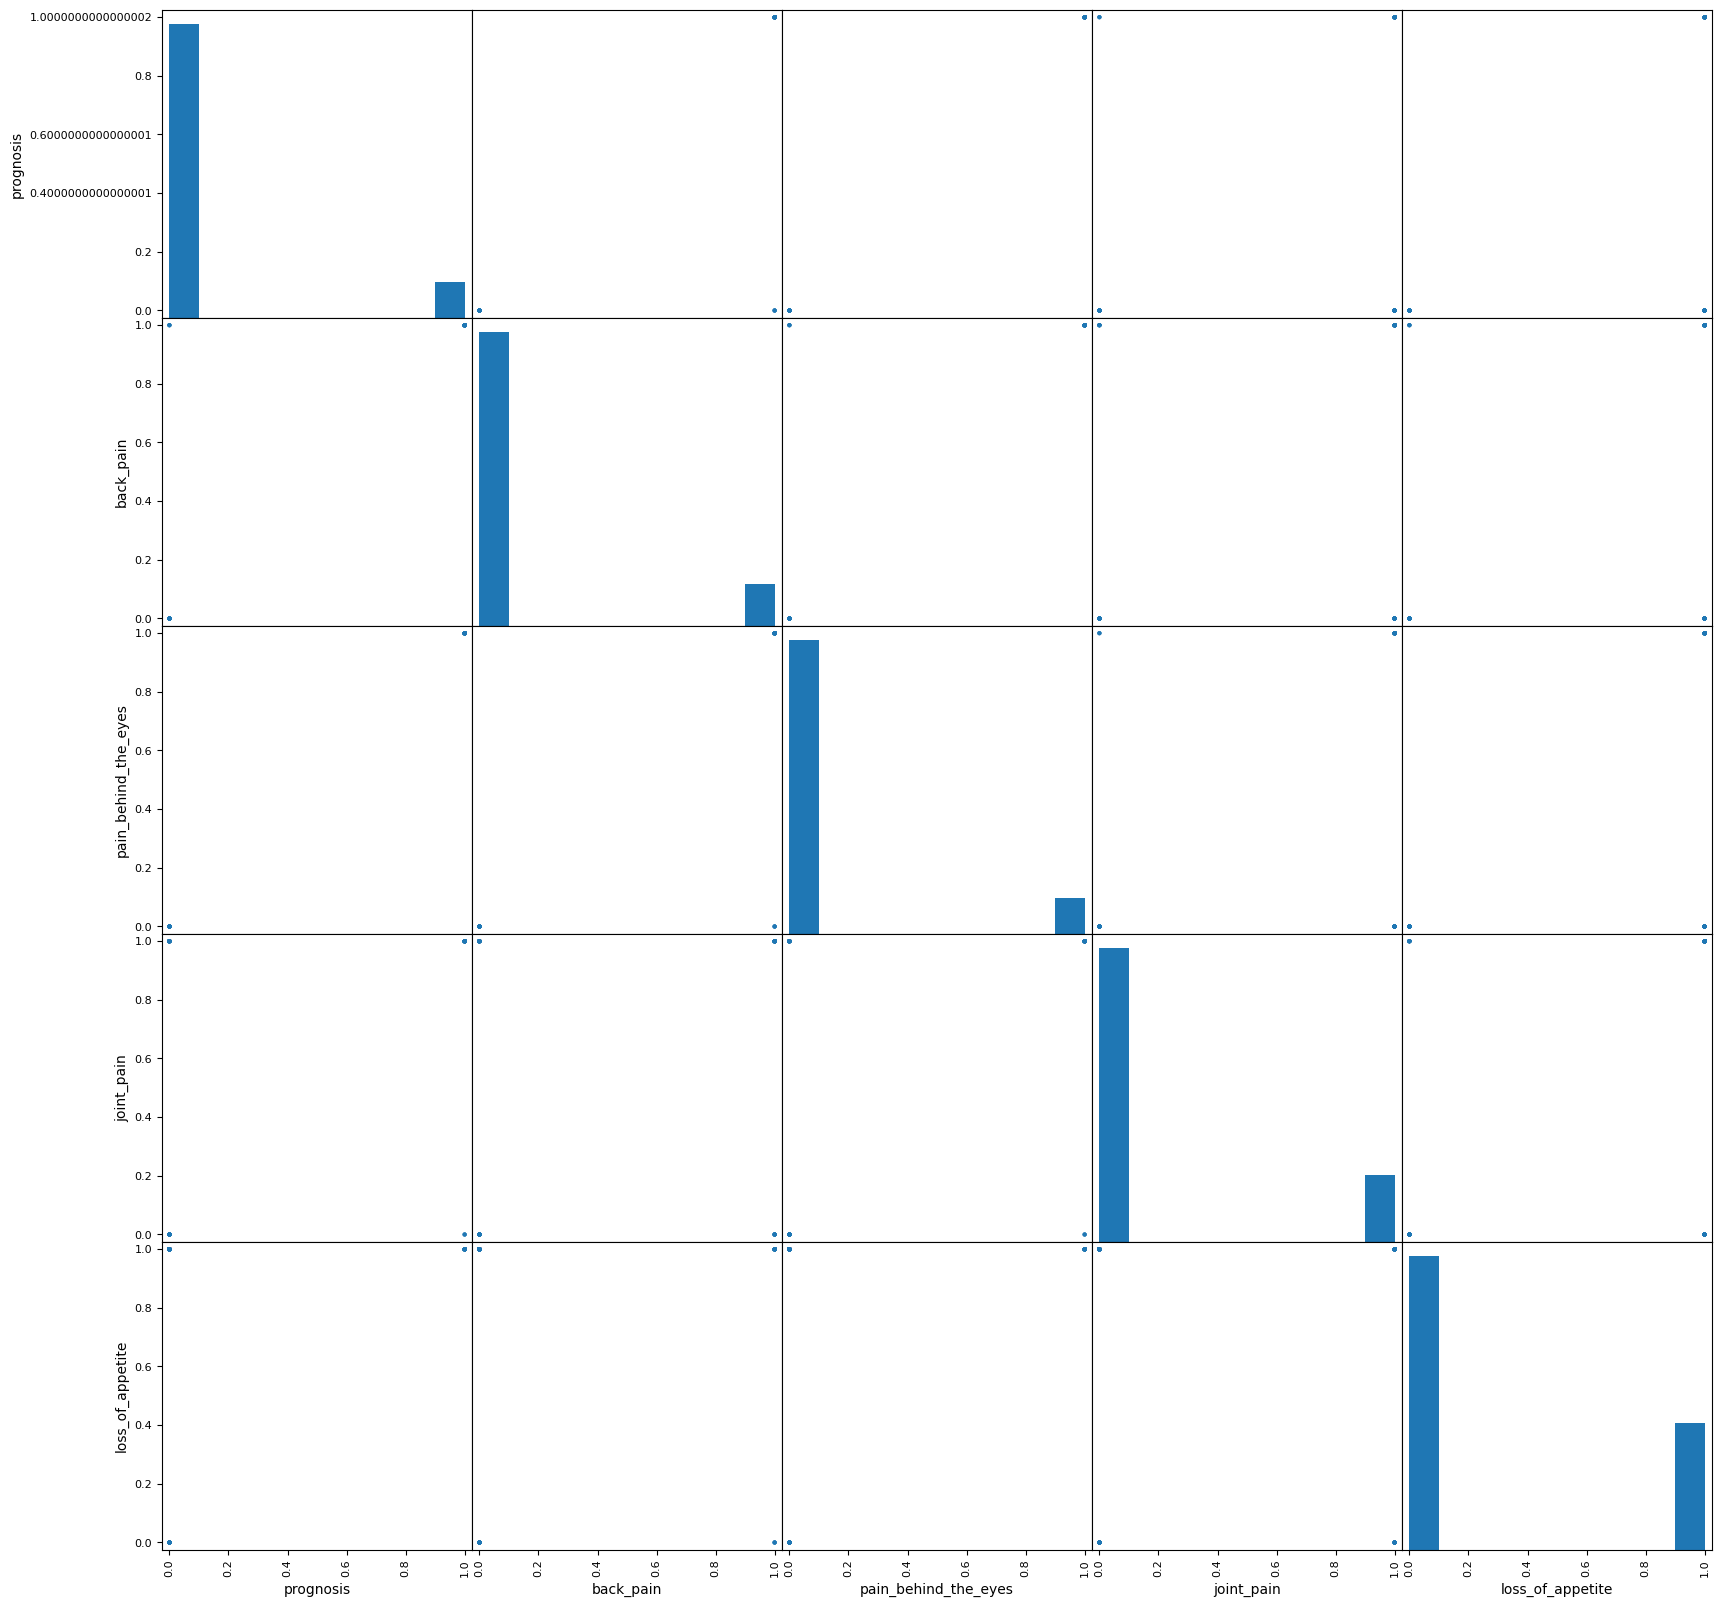

In [17]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","back_pain", "pain_behind_the_eyes","joint_pain","loss_of_appetite"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='malaise', ylabel='prognosis'>,
        <Axes: xlabel='red_spots_over_body', ylabel='prognosis'>,
        <Axes: xlabel='skin_rash', ylabel='prognosis'>,
        <Axes: xlabel='muscle_pain', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='malaise'>,
        <Axes: xlabel='malaise', ylabel='malaise'>,
        <Axes: xlabel='red_spots_over_body', ylabel='malaise'>,
        <Axes: xlabel='skin_rash', ylabel='malaise'>,
        <Axes: xlabel='muscle_pain', ylabel='malaise'>],
       [<Axes: xlabel='prognosis', ylabel='red_spots_over_body'>,
        <Axes: xlabel='malaise', ylabel='red_spots_over_body'>,
        <Axes: xlabel='red_spots_over_body', ylabel='red_spots_over_body'>,
        <Axes: xlabel='skin_rash', ylabel='red_spots_over_body'>,
        <Axes: xlabel='muscle_pain', ylabel='red_spots_over_body'>],
       [<Axes: xlabel='prognosis', ylabel='skin_rash'>,
        <Axes: xlabel='malaise'

<Figure size 640x480 with 0 Axes>

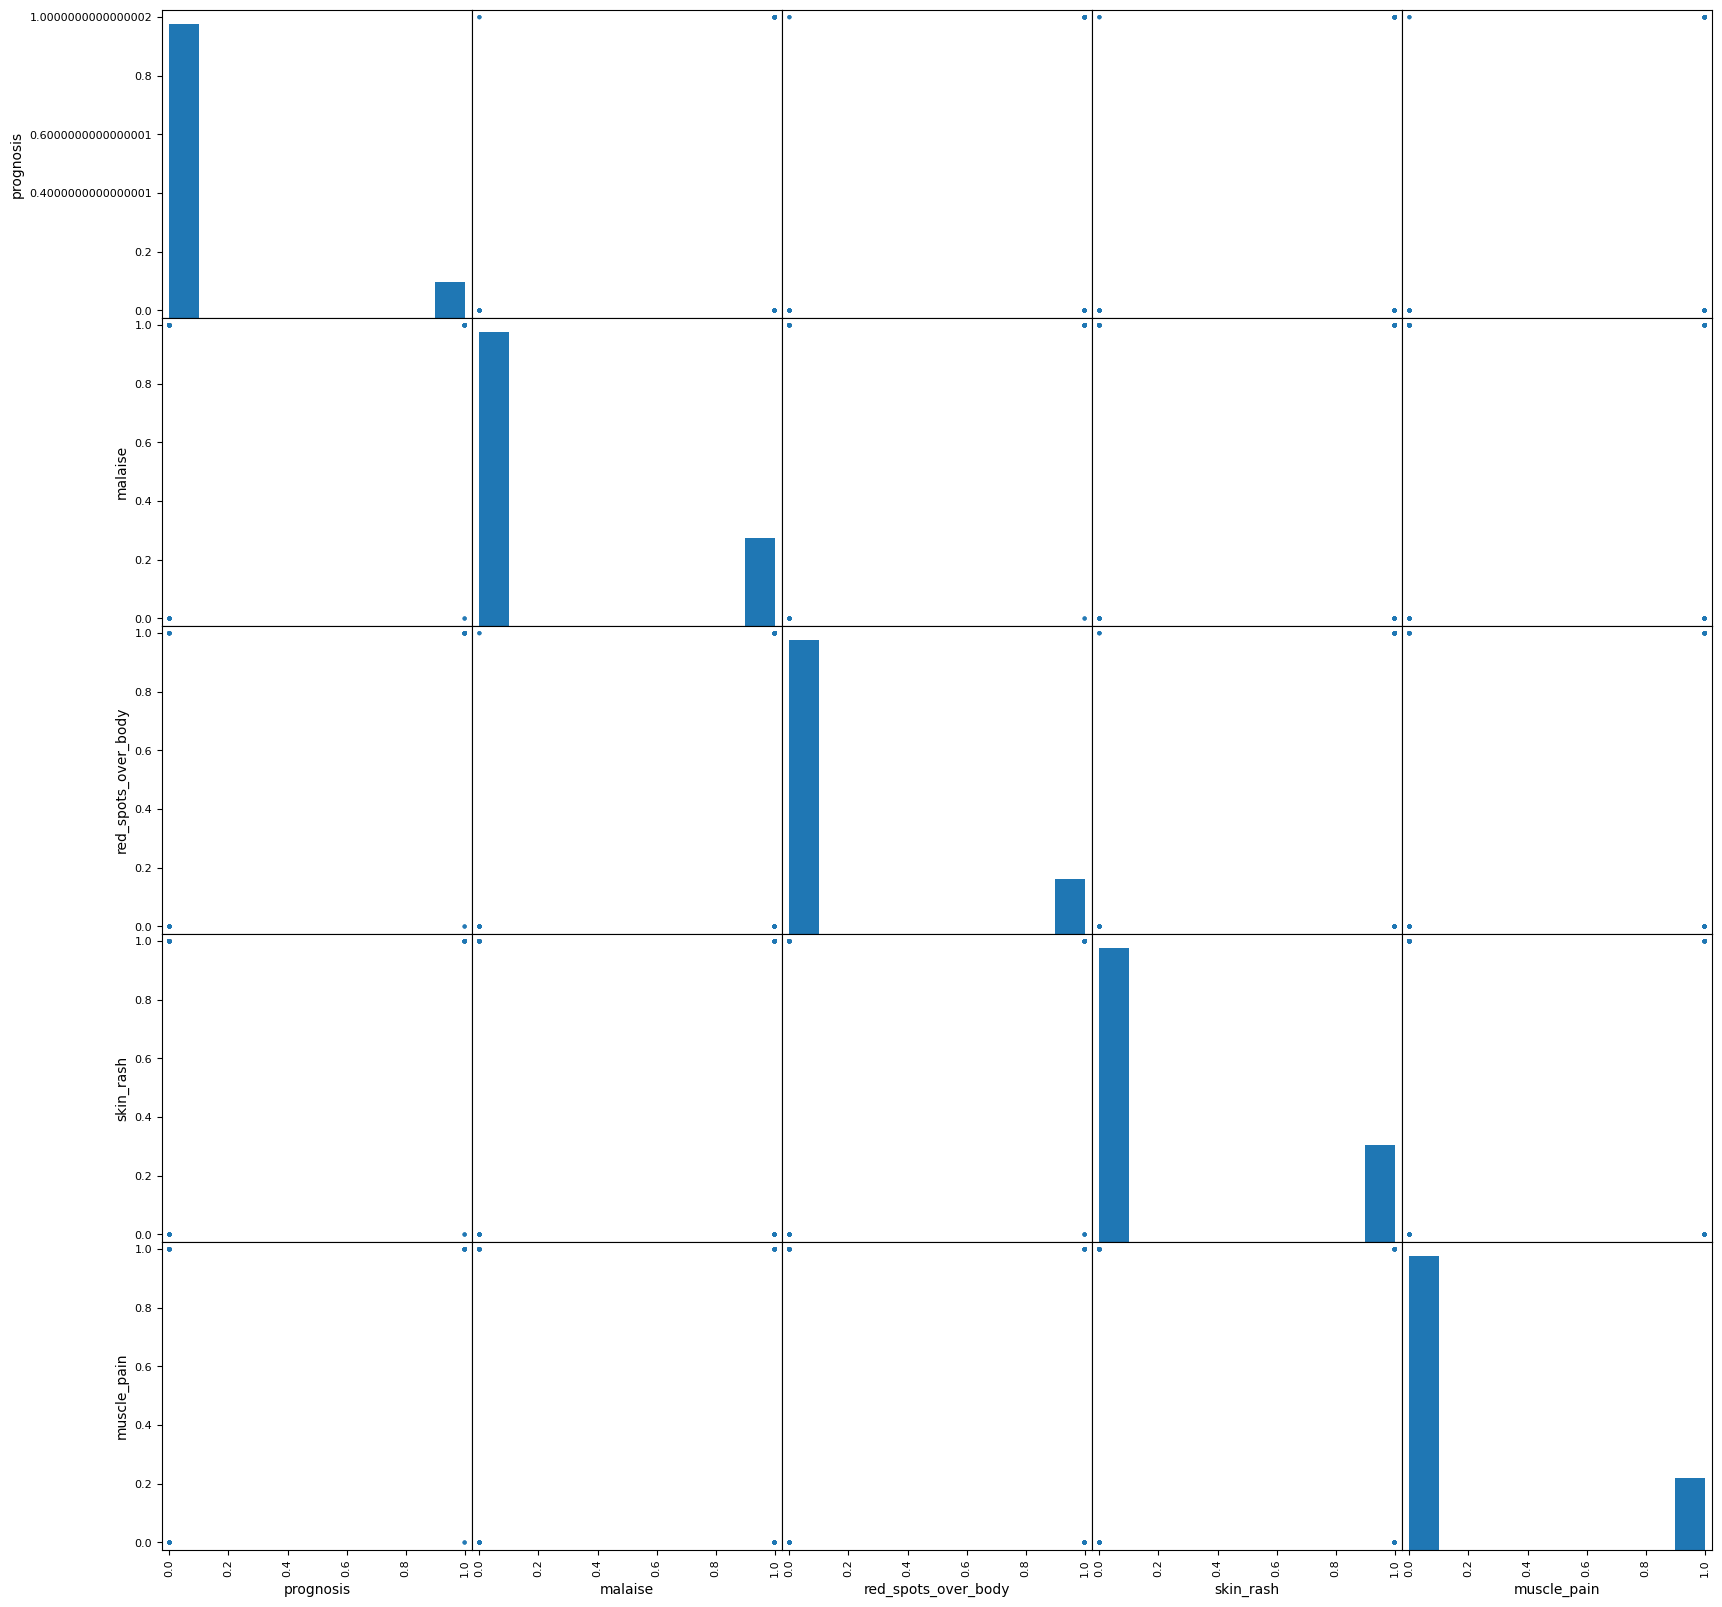

In [18]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","malaise","red_spots_over_body","skin_rash","muscle_pain",]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='fatigue', ylabel='prognosis'>,
        <Axes: xlabel='nausea', ylabel='prognosis'>,
        <Axes: xlabel='headache', ylabel='prognosis'>,
        <Axes: xlabel='vomiting', ylabel='prognosis'>,
        <Axes: xlabel='high_fever', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='fatigue'>,
        <Axes: xlabel='fatigue', ylabel='fatigue'>,
        <Axes: xlabel='nausea', ylabel='fatigue'>,
        <Axes: xlabel='headache', ylabel='fatigue'>,
        <Axes: xlabel='vomiting', ylabel='fatigue'>,
        <Axes: xlabel='high_fever', ylabel='fatigue'>],
       [<Axes: xlabel='prognosis', ylabel='nausea'>,
        <Axes: xlabel='fatigue', ylabel='nausea'>,
        <Axes: xlabel='nausea', ylabel='nausea'>,
        <Axes: xlabel='headache', ylabel='nausea'>,
        <Axes: xlabel='vomiting', ylabel='nausea'>,
        <Axes: xlabel='high_fever', ylabel='nausea'>],
       [<Axes: xlabel='prognosis', yl

<Figure size 640x480 with 0 Axes>

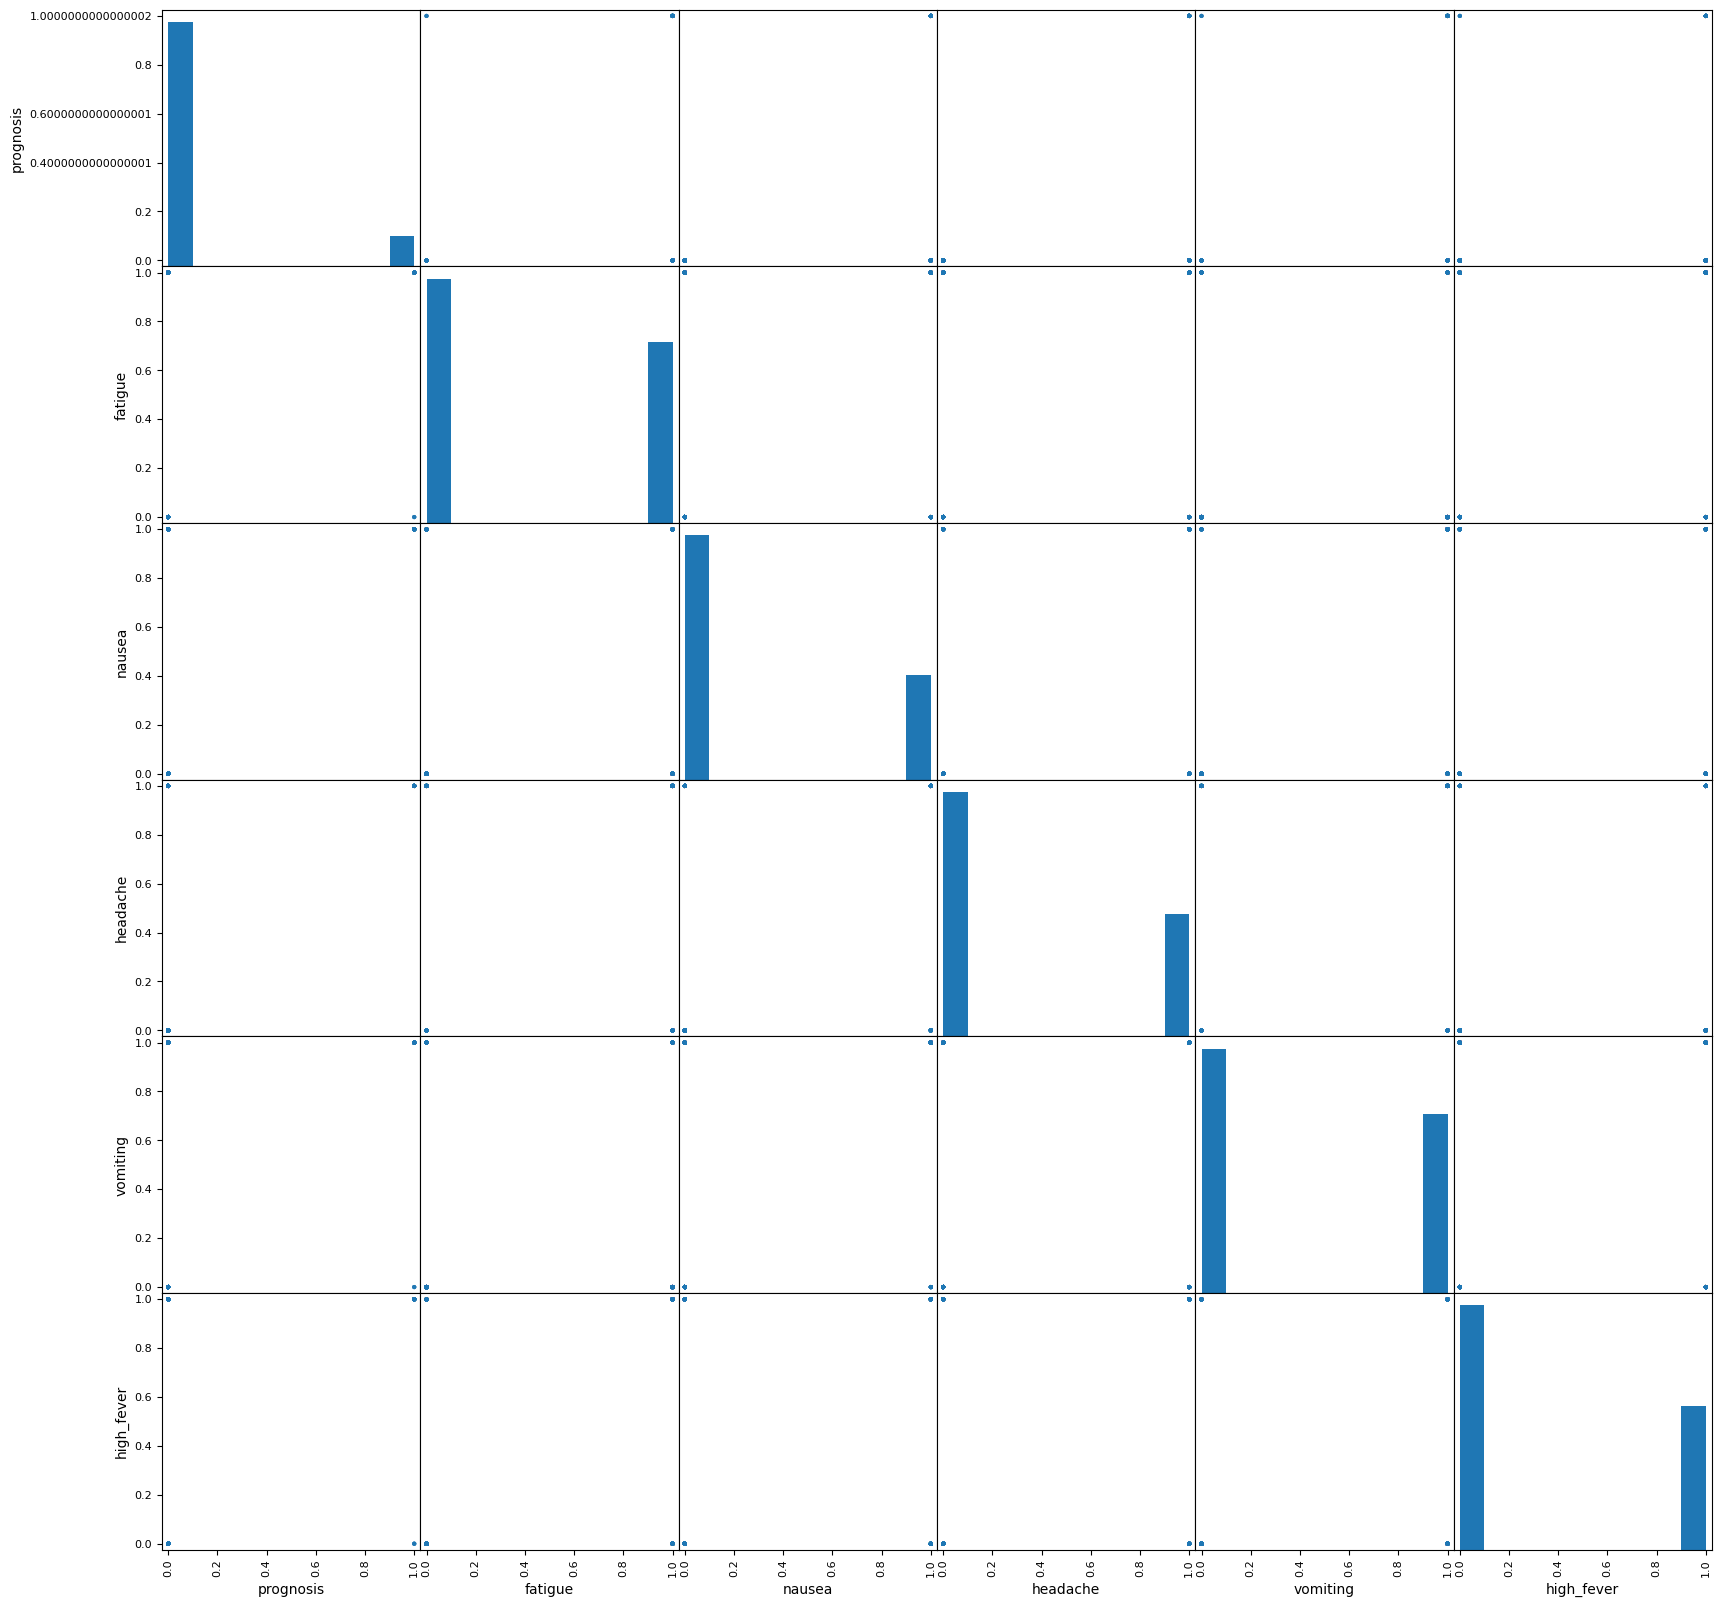

In [19]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","fatigue","nausea","headache","vomiting", "high_fever"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>,
        <Axes: xlabel='abdominal_pain', ylabel='prognosis'>,
        <Axes: xlabel='belly_pain', ylabel='prognosis'>,
        <Axes: xlabel='constipation', ylabel='prognosis'>,
        <Axes: xlabel='sweating', ylabel='prognosis'>,
        <Axes: xlabel='diarrhoea', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='abdominal_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='belly_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='constipation', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='sweating', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='diarrhoea', ylabel='toxic_look_(typhos)'>],
       [<Axes: xlabel='prognosis', ylabel='abdominal_pain'>,
        <Axes: xlabel='toxic_look_(typhos)', yl

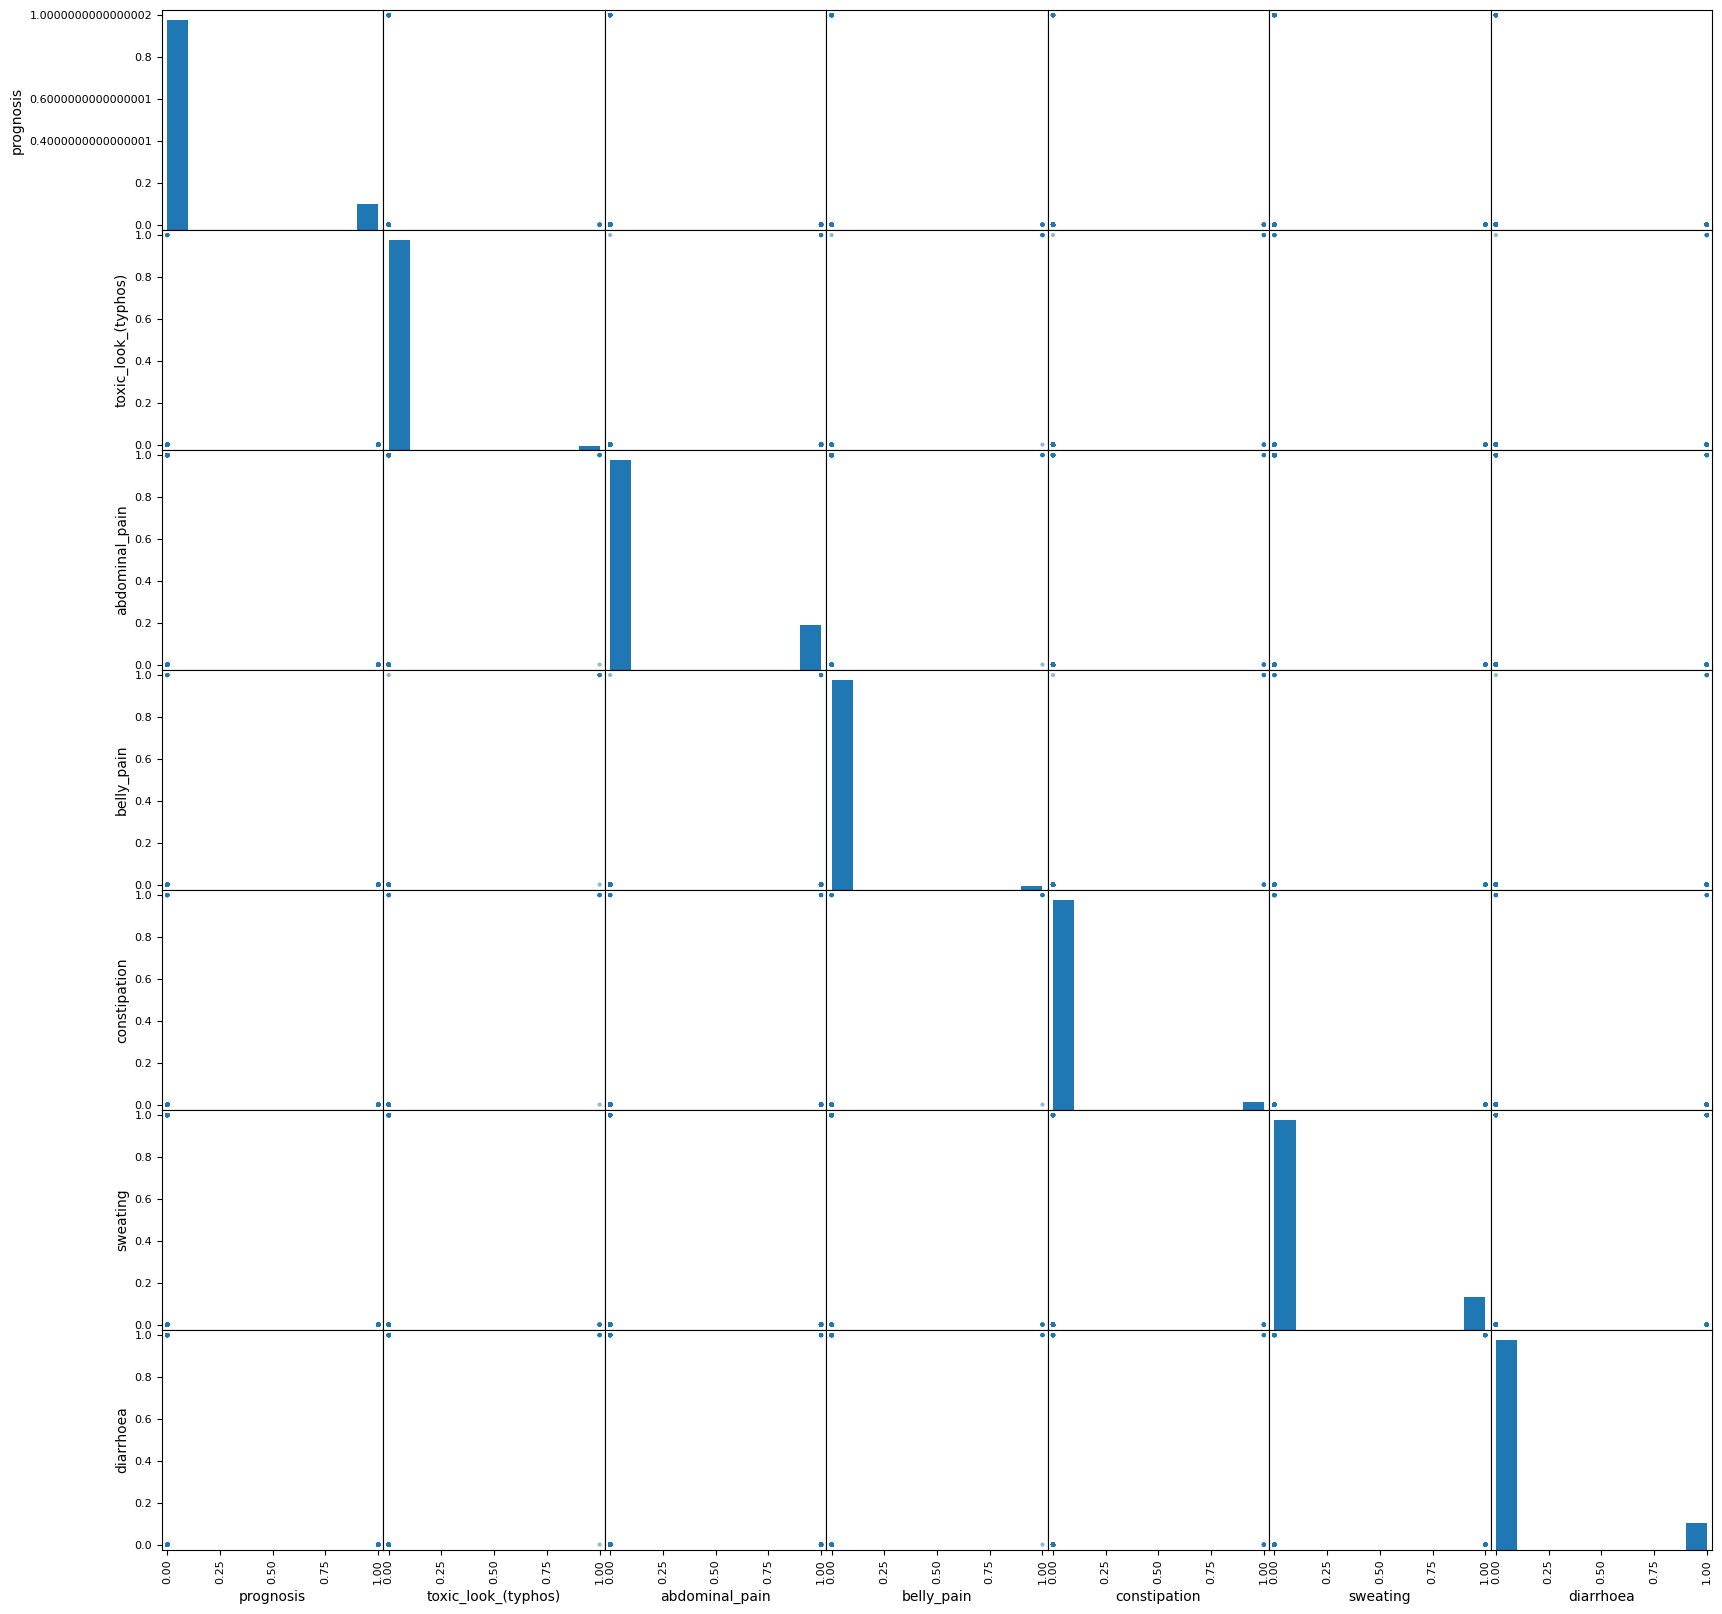

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["prognosis","toxic_look_(typhos)","abdominal_pain","belly_pain", "constipation", "sweating","diarrhoea"]
scatter_matrix(training_set[attributes], figsize=(20,20))

back_pain                         1.000000
pain_behind_the_eyes              1.000000
prognosis                         1.000000
joint_pain                        0.967934
loss_of_appetite                  0.954315
malaise                           0.915901
red_spots_over_body               0.915901
skin_rash                         0.625250
muscle_pain                       0.562421
fatigue                           0.544613
nausea                            0.406694
headache                          0.392534
vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='back_pain', ylabel='prognosis'>

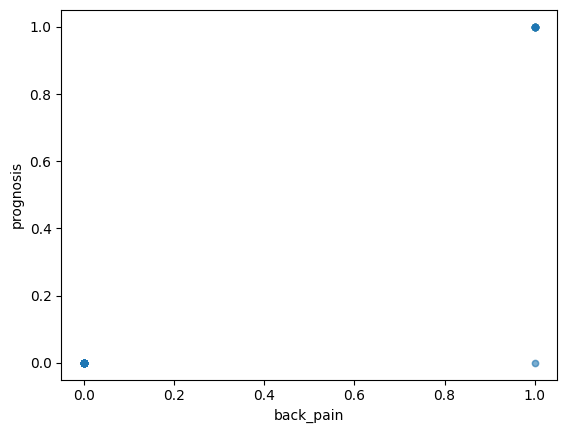

In [21]:
training_set.plot(kind="scatter", x="back_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>

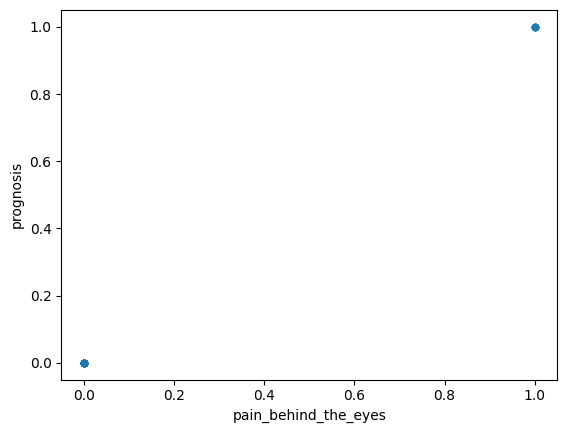

In [22]:
training_set.plot(kind="scatter", x="pain_behind_the_eyes", y="prognosis", alpha=0.1)

<Axes: xlabel='joint_pain', ylabel='prognosis'>

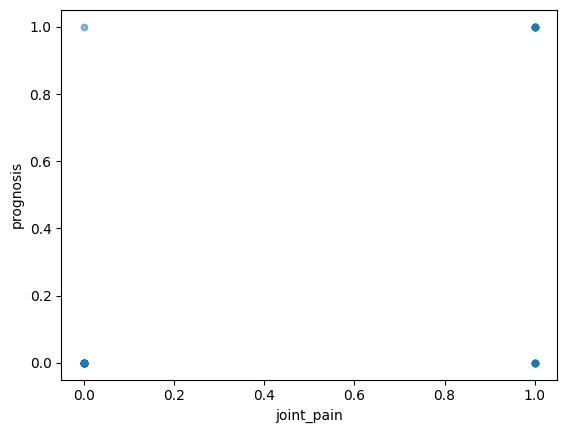

In [23]:
training_set.plot(kind="scatter", x="joint_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='loss_of_appetite', ylabel='prognosis'>

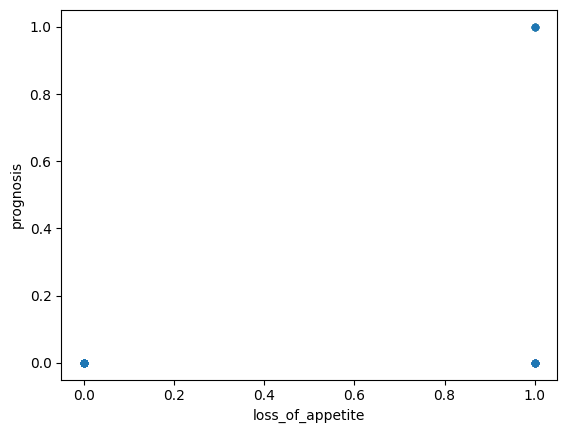

In [24]:
training_set.plot(kind="scatter", x="loss_of_appetite", y="prognosis", alpha=0.1)

<Axes: xlabel='malaise', ylabel='prognosis'>

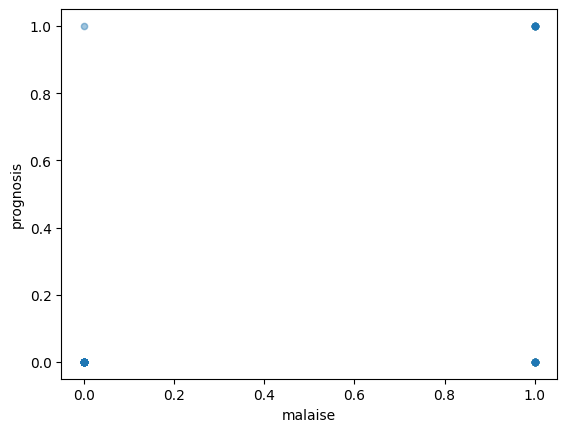

In [25]:
training_set.plot(kind="scatter", x="malaise", y="prognosis", alpha=0.1)

<Axes: xlabel='red_spots_over_body', ylabel='prognosis'>

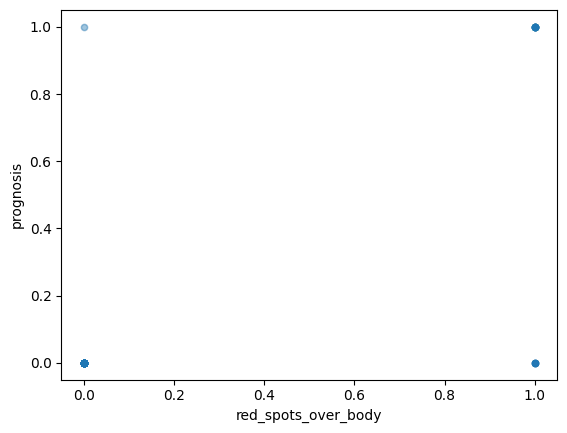

In [26]:
training_set.plot(kind="scatter", x="red_spots_over_body", y="prognosis", alpha=0.1)

<Axes: xlabel='skin_rash', ylabel='prognosis'>

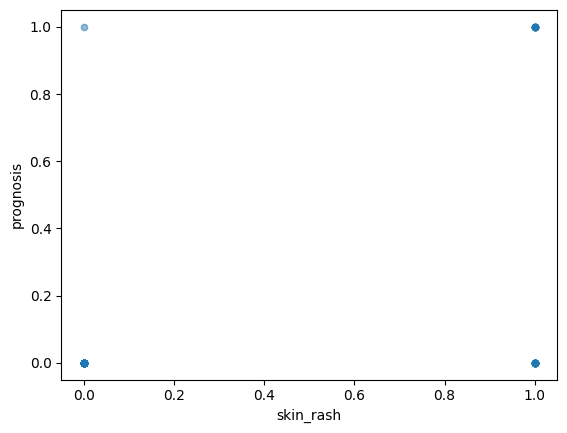

In [27]:
training_set.plot(kind="scatter", x="skin_rash", y="prognosis", alpha=0.1)

<Axes: xlabel='muscle_pain', ylabel='prognosis'>

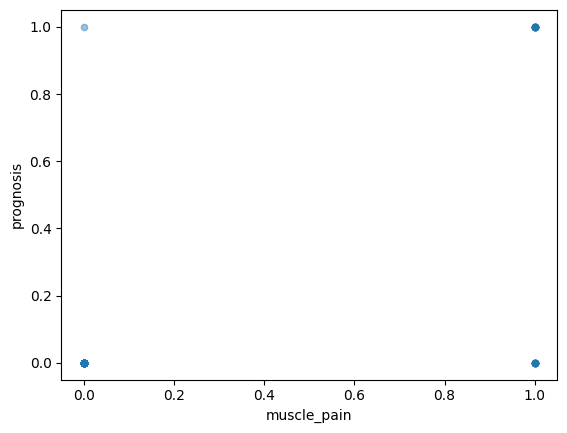

In [28]:
training_set.plot(kind="scatter", x="muscle_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='fatigue', ylabel='prognosis'>

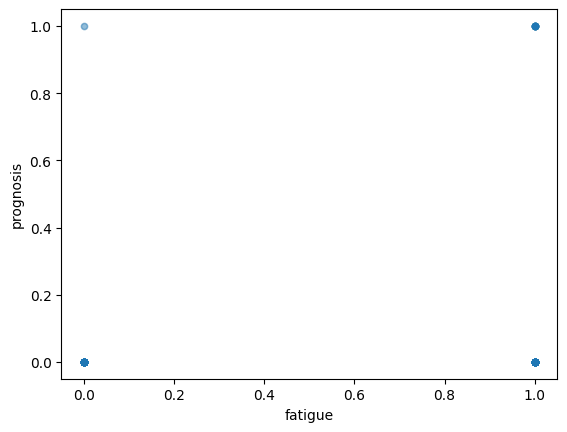

In [29]:
training_set.plot(kind="scatter", x="fatigue", y="prognosis", alpha=0.1)

<Axes: xlabel='nausea', ylabel='prognosis'>

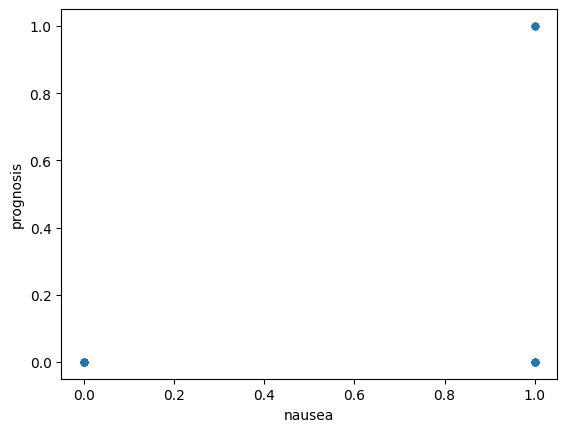

In [30]:
training_set.plot(kind="scatter", x="nausea", y="prognosis", alpha=0.1)

<Axes: xlabel='headache', ylabel='prognosis'>

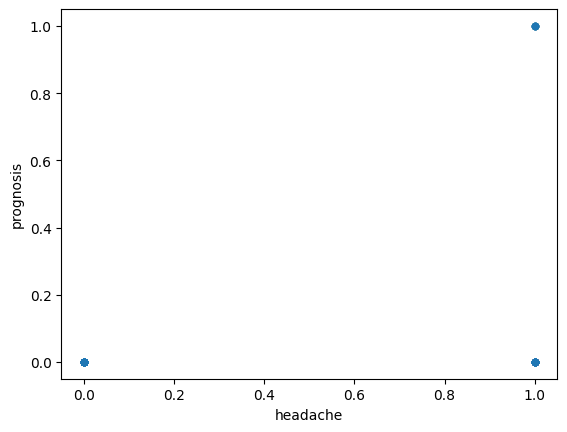

In [31]:
training_set.plot(kind="scatter", x="headache", y="prognosis", alpha=0.1)

vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='vomiting', ylabel='prognosis'>

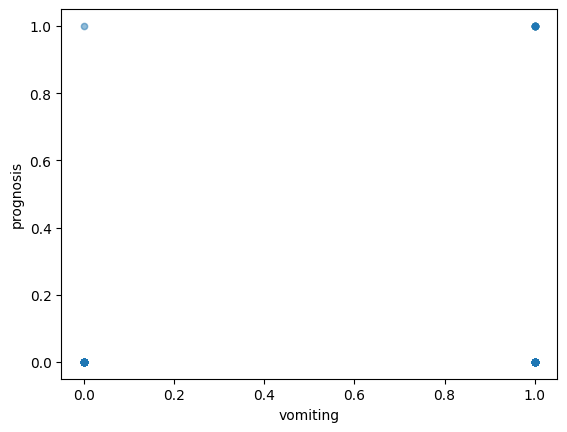

In [32]:
training_set.plot(kind="scatter", x="vomiting", y="prognosis", alpha=0.1)

<Axes: xlabel='high_fever', ylabel='prognosis'>

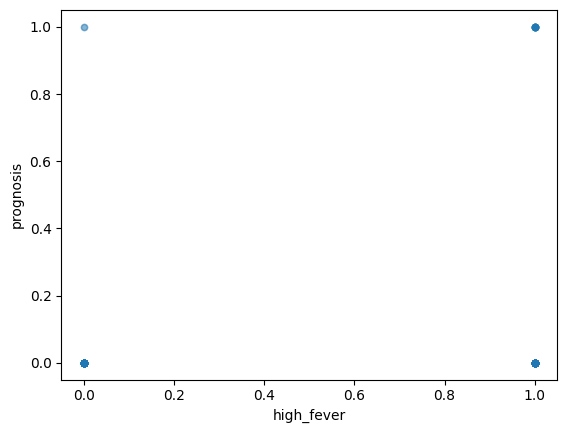

In [33]:
training_set.plot(kind="scatter", x="high_fever", y="prognosis", alpha=0.1)

<Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>

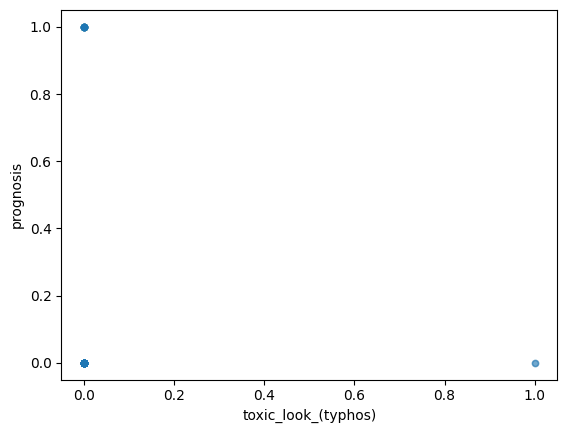

In [34]:
training_set.plot(kind="scatter", x="toxic_look_(typhos)", y="prognosis", alpha=0.1)

<Axes: xlabel='abdominal_pain', ylabel='prognosis'>

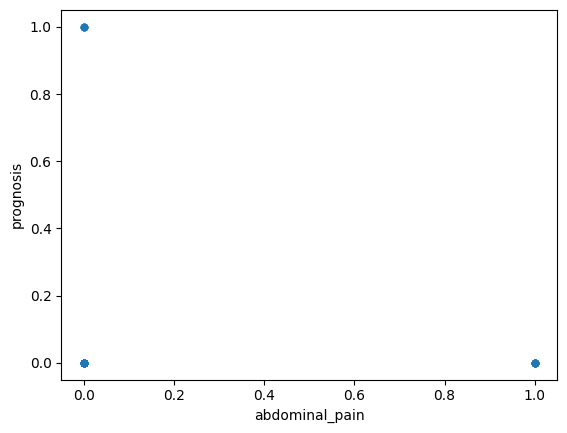

In [35]:
training_set.plot(kind="scatter", x="abdominal_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='belly_pain', ylabel='prognosis'>

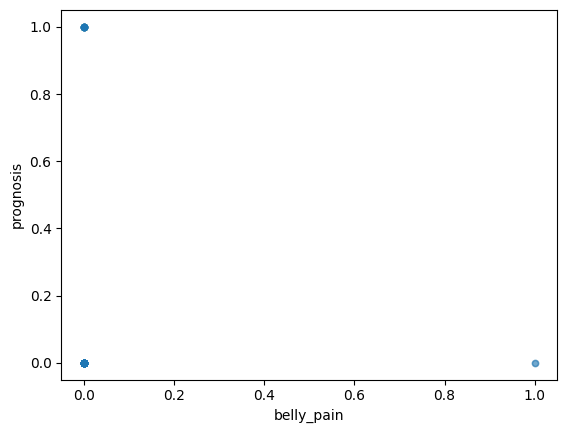

In [36]:
training_set.plot(kind="scatter", x="belly_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='constipation', ylabel='prognosis'>

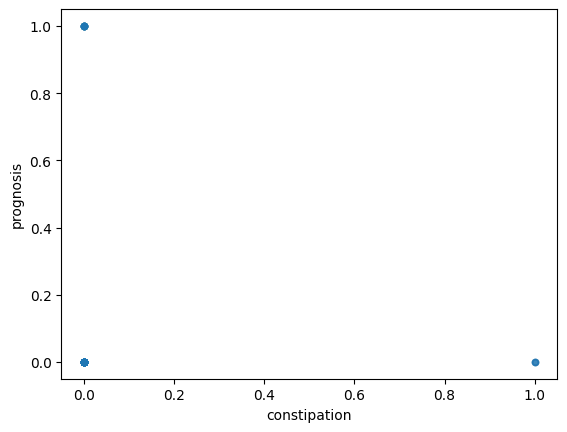

In [37]:
training_set.plot(kind="scatter", x="constipation", y="prognosis", alpha=0.1)

<Axes: xlabel='sweating', ylabel='prognosis'>

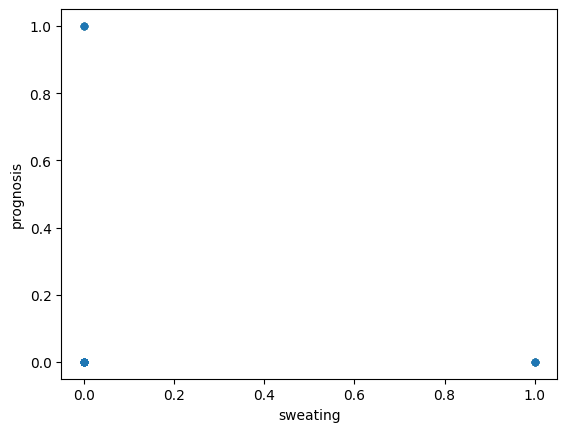

In [38]:
training_set.plot(kind="scatter", x="sweating", y="prognosis", alpha=0.1)

<Axes: xlabel='diarrhoea', ylabel='prognosis'>

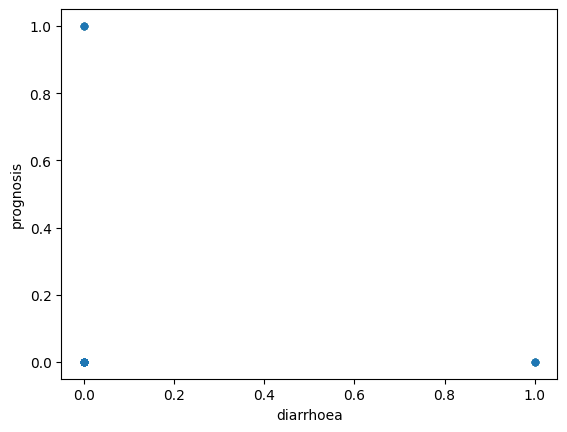

In [39]:
training_set.plot(kind="scatter", x="diarrhoea", y="prognosis", alpha=0.1)                                             

## Preparing the DataSet ML for (Machine Learning) Models

In [40]:
training_set.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [41]:
## our objective is predict dengue. in that case prognosis variable is already available. so then we can use the supervised learning method
 ## seperate the label and rest of the data

In [42]:
training_set_data = training_set.drop("prognosis", axis=1)

training_set_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [43]:
training_set_data_label = training_set["prognosis"].copy()
training_set_data_label

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [44]:
len(training_set_data_label)

520

In [45]:
training_set_data_label.isnull().sum()

0

In [46]:
## Data Cleaning

In [47]:
### check  any particular missing values are there

In [48]:
len(training_set_data)

520

In [49]:
training_set_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [50]:
### According to the above dataset missing values are not there then we dont need filling the missing values

In [51]:
training_set_data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0          1          1                     1                    0          0   
1          0          1                     1                    0          0   
2          1          0                     1                    0          0   
3          1          1                     0                    0          0   
4          1          1                     1                    0          0   
5          0          1                     1                    0          0   
6          1          0                     1                    0          0   
7          1          1                     0                    0          0   
8          1          1                     1                    0          0   
9          1          1                     1                    0          0   
10         0          0                     0                    1          1   
11         0          0                     0                    0          1   
12         0          0                     0                    1          0   
13         0          0                     0                    1          1   
14         0          0                     0                    1          1   
15         0          0                     0                    0          1   
16         0          0                     0                    1          0   
17         0          0                     0                    1          1   
18         0          0                     0                    1          1   
19         0          0                     0                    1          1   
20         0          0                     0                    0          0   
21         0          0                     0                    0          0   
22         0          0                     0                    0          0   
23         0          0                     0                    0          0   
24         0          0                     0                    0          0   
25         0          0                     0                    0          0   
26         0          0                     0                    0          0   
27         0          0                     0                    0          0   
28         0          0                     0                    0          0   
29         0          0                     0                    0          0   
30         1          0                     0                    0          0   
31         0          0                     0                    0          0   
32         1          0                     0                    0          0   
33         1          0                     0                    0          0   
34         1          0                     0                    0          0   
35         1          0                     0                    0          0   
36         1          0                     0                    0          0   
37         1          0                     0                    0          0   
38         1          0                     0                    0          0   
39         1          0                     0                    0          0   
40         1          1                     0                    0          0   
41         1          0                     0                    0          0   
42         1          1                     0                    0          0   
43         1          1                     0                    0          0   
44         1          1                     0                    0          0   
45         0          1                     0                    0          0   
46         1          0                     0                    0          0   
47         1          1                     0                    0          0   
48         1          1             

In [52]:
len(training_set_data)

520

In [53]:
len(training_set_data_label)

520

# Model selecting and training

In [54]:
from sklearn.model_selection import train_test_split

# Splitting train set into the training and validation set
X_train, X_test, y_train, y_test = train_test_split(training_set_data, training_set_data_label, test_size=0.2, random_state=42)



In [55]:
X_train_pd = pd.DataFrame(X_train, columns=training_set_data.columns)
X_train_pd.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
434        0          0                     0                    0          0   
436        0          0                     0                    0          0   
208        1          0                     0                    0          0   
332        0          0                     0                    0          0   
220        0          0                     0                    0          0   

     chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
434       1           0             0        0                 0   
436       0           0             0        0                 0   
208       0           0             0        0                 0   
332       0           0             0        0                 0   
220       0           1             0        0                 0   

     muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
434               0         1                    0                    0   
436               0         1                    0                    0   
208               0         0                    0                    0   
332               0         1                    0                    0   
220               0         1                    0                    0   

     fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
434        0            0        0                     0            0   
436        0            0        0                     0            0   
208        1            0        0                     0            0   
332        1            0        1                     0            0   
220        1            0        0                     0            0   

     weight_loss  restlessness  lethargy  patches_in_throat  \
434            0             0         0                  0   
436            0             0         0                  0   
208            0             0         1                  0   
332            0             0         0                  0   
220            0             0         0                  0   

     irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
434                      0      0           1            0               0   
436                      0      0           1            0               0   
208                      0      0           0            0               0   
332                      0      0           0            0               0   
220                      0      0           0            0               0   

     sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
434         1            0            0         1               0           0   
436         1            0            0         1               0           0   
208         0            0            0         0               1           1   
332         1            0            0         1               0           0   
220         0            0            0         0               1           1   

     nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
434       1                 0                     0          0             0   
436       1                 0                     0          0             0   
208       0                 1                     0          0             0   
332       1                 0                     0          0             0   
220       1                 1                     0          0             0   

     abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
434               0          1           0             0                  0   
436               0          1           0             0                  0   
208               0          0           0             1                  1   
332               0          0           0             0                  0   
220     

In [56]:
Y_train_pd = pd.DataFrame(y_train)
Y_train_pd.head()

prognosis
434          0
436          0
208          0
332          0
220          0

In [57]:
 #Import models
from sklearn.tree import DecisionTreeClassifier
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:

Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [59]:
# Performance Measure Of Your Model

In [60]:

mse_Of_Dt = mean_squared_error(y_test, Dt_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Dt:.4f}")

Mean Squared Error (MSE): 0.0000


In [61]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=42)
Rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
Rf_value_predictions = Rf_clf.predict(X_test)
Rf_value_accuracy = accuracy_score(y_test, Rf_value_predictions)
print(f"\nValidation Accuracy: {Rf_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [63]:
# Performance Mesure Of Your Model

In [64]:
mse_Of_Rf = mean_squared_error(y_test, Rf_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Rf:.4f}")

Mean Squared Error (MSE): 0.0000


In [65]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42)
LR_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [66]:
Lr_value_predictions = LR_clf.predict(X_test)
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [67]:
 #Performance Mesure Of Your Model

In [68]:
mse_Of_Lr = mean_squared_error(y_test, Lr_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Lr:.4f}")

Mean Squared Error (MSE): 0.0000


## Handle the overfitting issue

In [69]:

corr_matrix["prognosis"].sort_values(ascending=False)

prognosis                         1.000000
pain_behind_the_eyes              1.000000
back_pain                         0.928316
red_spots_over_body               0.726468
joint_pain                        0.642191
muscle_pain                       0.632779
malaise                           0.567548
chills                            0.543450
nausea                            0.535964
loss_of_appetite                  0.533520
skin_rash                         0.525343
headache                          0.494778
high_fever                        0.367521
vomiting                          0.334971
fatigue                           0.333406
foul_smell_of urine              -0.040986
weakness_in_limbs                -0.043859
spotting_ urination              -0.043859
extra_marital_contacts           -0.043859
muscle_wasting                   -0.043859
ulcers_on_tongue                 -0.043859
dehydration                      -0.043859
watering_from_eyes               -0.043859
sunken_eyes

In [70]:
#Remove the unnecessary coloumns

In [71]:
columns_to_drop = ['itching','stomach_pain', 'lethargy', 'sweating', 'abdominal_pain', 'continuous_sneezing', 'shivering', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
                   'constipation', 'belly_pain', 'watering_from_eyes', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
                   'nodal_skin_eruptions', 'continuous_sneezing', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',                 
                  'mood_swings', 'weight_loss', 'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'sunken_eyes', 'breathlessness', 'dehydration', 'indigestion', 'yellowish_skin',                         
                  'dark_urine', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region',
                  'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',                         
                  'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
                  'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',                       
                  'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
                  'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',                        
                  'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',                                
                  'red_sore_around_nose', 'yellow_crust_ooze', 'dischromic _patches', 'diarrhoea', 'mild_fever', 'swelled_lymph_nodes', 'toxic_look_(typhos)']

training_set_data.drop(columns=columns_to_drop, inplace=True)



In [72]:
training_prepared_data_new_pd=training_set_data
training_prepared_data_new_pd.head(10)

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0          1       0           0         0       0                 0   
1          1       0           0         0       0                 0   
2          0       0           0         0       0                 0   
3          1       0           0         0       0                 0   
4          1       0           0         0       0                 0   
5          1       0           0         0       0                 0   
6          0       0           0         0       0                 0   
7          1       0           0         0       0                 0   
8          1       0           0         0       0                 0   
9          1       0           0         0       0                 0   

   pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  
0                     0          0        0            0                    0  
1                     0          0        0            0                    0  
2                     0          0        0            0                    0  
3                     0          0        0            0                    0  
4                     0          0        0            0                    0  
5                     0          0        0            0                    0  
6                     0          0        0            0                    0  
7                     0          0        0            0                    0  
8                     0          0        0            0                    0  
9                     0          0        0            0                    0

In [73]:
training_prepared_data_new_pd.head(5)


skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0          1       0           0         0       0                 0   
1          1       0           0         0       0                 0   
2          0       0           0         0       0                 0   
3          1       0           0         0       0                 0   
4          1       0           0         0       0                 0   

   pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  
0                     0          0        0            0                    0  
1                     0          0        0            0                    0  
2                     0          0        0            0                    0  
3                     0          0        0            0                    0  
4                     0          0        0            0                    0

In [74]:
## Save the newly created training dataset in .csv file

In [75]:
training_prepared_data_new_pd.to_csv("training_new_dataset.csv", index=False)
print("training dataset file saved successfully.")

training dataset file saved successfully.


In [76]:
training_new_dataset_pd=pd.read_csv("training_new_dataset.csv")

In [77]:
training_new_dataset_pd.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0          1       0           0         0       0                 0   
1          1       0           0         0       0                 0   
2          0       0           0         0       0                 0   
3          1       0           0         0       0                 0   
4          1       0           0         0       0                 0   

   pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  
0                     0          0        0            0                    0  
1                     0          0        0            0                    0  
2                     0          0        0            0                    0  
3                     0          0        0            0                    0  
4                     0          0        0            0                    0

In [78]:
len(training_new_dataset_pd)

520

In [79]:
training_new_dataset_pd

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0            1       0           0         0       0                 0   
1            1       0           0         0       0                 0   
2            0       0           0         0       0                 0   
3            1       0           0         0       0                 0   
4            1       0           0         0       0                 0   
5            1       0           0         0       0                 0   
6            0       0           0         0       0                 0   
7            1       0           0         0       0                 0   
8            1       0           0         0       0                 0   
9            1       0           0         0       0                 0   
10           0       1           0         0       0                 0   
11           0       1           0         0       0                 0   
12           0       1           0         0       0                 0   
13           0       0           0         0       0                 0   
14           0       1           0         0       0                 0   
15           0       1           0         0       0                 0   
16           0       1           0         0       0                 0   
17           0       0           0         0       0                 0   
18           0       1           0         0       0                 0   
19           0       1           0         0       0                 0   
20           0       0           0         0       0                 0   
21           0       0           0         0       0                 0   
22           0       0           0         0       0                 0   
23           0       0           0         0       0                 0   
24           0       0           0         0       0                 0   
25           0       0           0         0       0                 0   
26           0       0           0         0       0                 0   
27           0       0           0         0       0                 0   
28           0       0           0         0       0                 0   
29           0       0           0         0       0                 0   
30           0       0           0         0       1                 1   
31           0       0           0         0       1                 1   
32           0       0           0         0       1                 1   
33           0       0           0         0       1                 1   
34           0       0           0         0       0                 1   
35           0       0           0         0       1                 0   
36           0       0           0         0       1                 1   
37           0       0           0         0       1                 1   
38           0       0           0         0       1                 1   
39           0       0           0         0       1                 1   
40           1       0           0         0       0                 0   
41           0       0           0         0       0                 0   
42           1       0           0         0       0                 0   
43           1       0           0         0       0                 0   
44           1       0           0         0       0                 0   
45           1       0           0         0       0                 0   
46           0       0           0         0       0                 0   
47           1       0           0         0       0                 0   
48           1       0           0         0       0                 0   
49           1       0           0         0       0                 0   
50           0       0           0         0       0                 1   
51           0       0           0         0       0                 0   
52           0       0           0         0       0                 1   
53       

In [80]:
# check the null values

In [81]:
training_new_dataset_pd.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
dtype: int64

In [82]:
## Get the length of the training dataset

In [83]:
import numpy as np
np.size(training_prepared_data_new_pd)

5720

## Hyper Parameter Tuning

In [84]:
## Hyper parameter tuning for Logistic regression



In [85]:
len(training_set_data_label)

520

In [86]:
len(training_new_dataset_pd)

520

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have your own dataset loaded into DataFrame named 'training_new_dataset_pd' and 'training_set_data_label'
#training_new_dataset_pd,training_set_data_label= make_classification(n_samples=451, n_features=11, n_informative=2, n_classes=2, random_state=42)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd, training_set_data_label, test_size=0.2, random_state=42)

# Instantiate logistic regression model with default parameters
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predictions on the test set
test_set_predictions = logreg_model.predict(X_test)

# Evaluate model performance with default parameters
accuracy = accuracy_score(y_test, test_set_predictions)
print("Accuracy with Default Parameters:", accuracy)

# Manually tune parameters
# Example: Setting regularization parameter C=0.1 and penalty='l2'
logreg_model_tuned = LogisticRegression(C=0.1, penalty='l2')

# Fit the model with tuned parameters on the training data
logreg_model_tuned.fit(X_train, y_train)

# Predictions on the test set with tuned parameters
test_set_predictions_tuned = logreg_model_tuned.predict(X_test)

# Evaluate model performance with tuned parameters
accuracy_tuned = accuracy_score(y_test, test_set_predictions_tuned)
print("Accuracy with Tuned Parameters:", accuracy_tuned)



Accuracy with Default Parameters: 1.0
Accuracy with Tuned Parameters: 1.0


In [88]:
## Hyper parameter tuning for Decision Tree model

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

#training_new_dataset_pd,training_set_data_label= make_classification(n_samples=451, n_features=11, n_informative=2, n_classes=2, random_state=42)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd,training_set_data_label, test_size=0.2, random_state=42)
# Decision Tree Classifier with Regularization (Pruning)
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=500, random_state=42)


# Train and evaluate models on the training set
dt_clf.fit(X_train, y_train)


# Predictions on the test set
dt_test_pred = dt_clf.predict(X_test)

# Model Evaluation
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)



# Calculate MSE and RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, dt_test_pred)
rmse_dt = np.sqrt(mse_dt)



# Print Results


print("Decision Tree Validation Accuracy:", dt_test_accuracy)
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_dt:.4f}")



Decision Tree Validation Accuracy: 0.8653846153846154
Decision Tree Mean Squared Error (MSE): 0.1346
Decision Tree Root Mean Squared Error (RMSE): 0.3669


In [90]:
## Hyper parameter tuning for Random Forest model

# Model Evaluation

In [91]:
def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("LR")
LR_accuracy = modelEvaluation(logreg_model, X_test, y_test)

print("DT")
DT_accuracy = modelEvaluation(dt_clf, X_test, y_test)


# Now you have the accuracy scores stored in variables for later use
print(f"LR Accuracy: {LR_accuracy:.4f}")
print(f"DT Accuracy: {DT_accuracy:.4f}")



LR
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        14

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


Confusion Matrix:
[[90  0]
 [ 0 14]]
DT
Accuracy: 0.8654
Precision: 0.7489
Recall: 0.8654
F1 Score: 0.8029

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        90
           1       0.00      0.00      0.00        14

    accuracy                           0.87       104
   macro avg       0.43      0.50      0.46       104
weighted avg       0.75      0.87      0.80       104


Confusion Matrix:
[[90  0]
 [14  0]]
LR Accuracy: 1.0000
DT Accuracy: 0.8654


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

# Cross validation 

In [92]:
## cross-validation for decision tree model

In [93]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.89285714 0.90361446 0.90361446 0.89156627 0.89156627]
Mean Cross-Validation Score: 0.8966437177280551


In [94]:
## cross-validation for logistic regression model

In [95]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg_model ,X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


In [96]:
## cross-validation for random forest model

In [97]:
# Selecting best model
# Accuracy random forest -  0.85375(85%), decision tree - 0.5025000000000001 (50%), logistic_regression - 0.8724999999999999 (87%)
# Among the models logistic regression is the best model  and also  prefered algorithm is random forest algorithm/model

##   Test set for predictions

In [98]:
test_data =pd.read_csv("Testing.csv")
test_data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   
42        0          0                     0                    0          0   
43        0          0                     0                    0          0   
44        1          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0        0           0             0        0                 0   
1        1           0             0        0                 0   
2        0           0             1        1                 1   
3        0           0             0        0          

<Figure size 640x480 with 0 Axes>

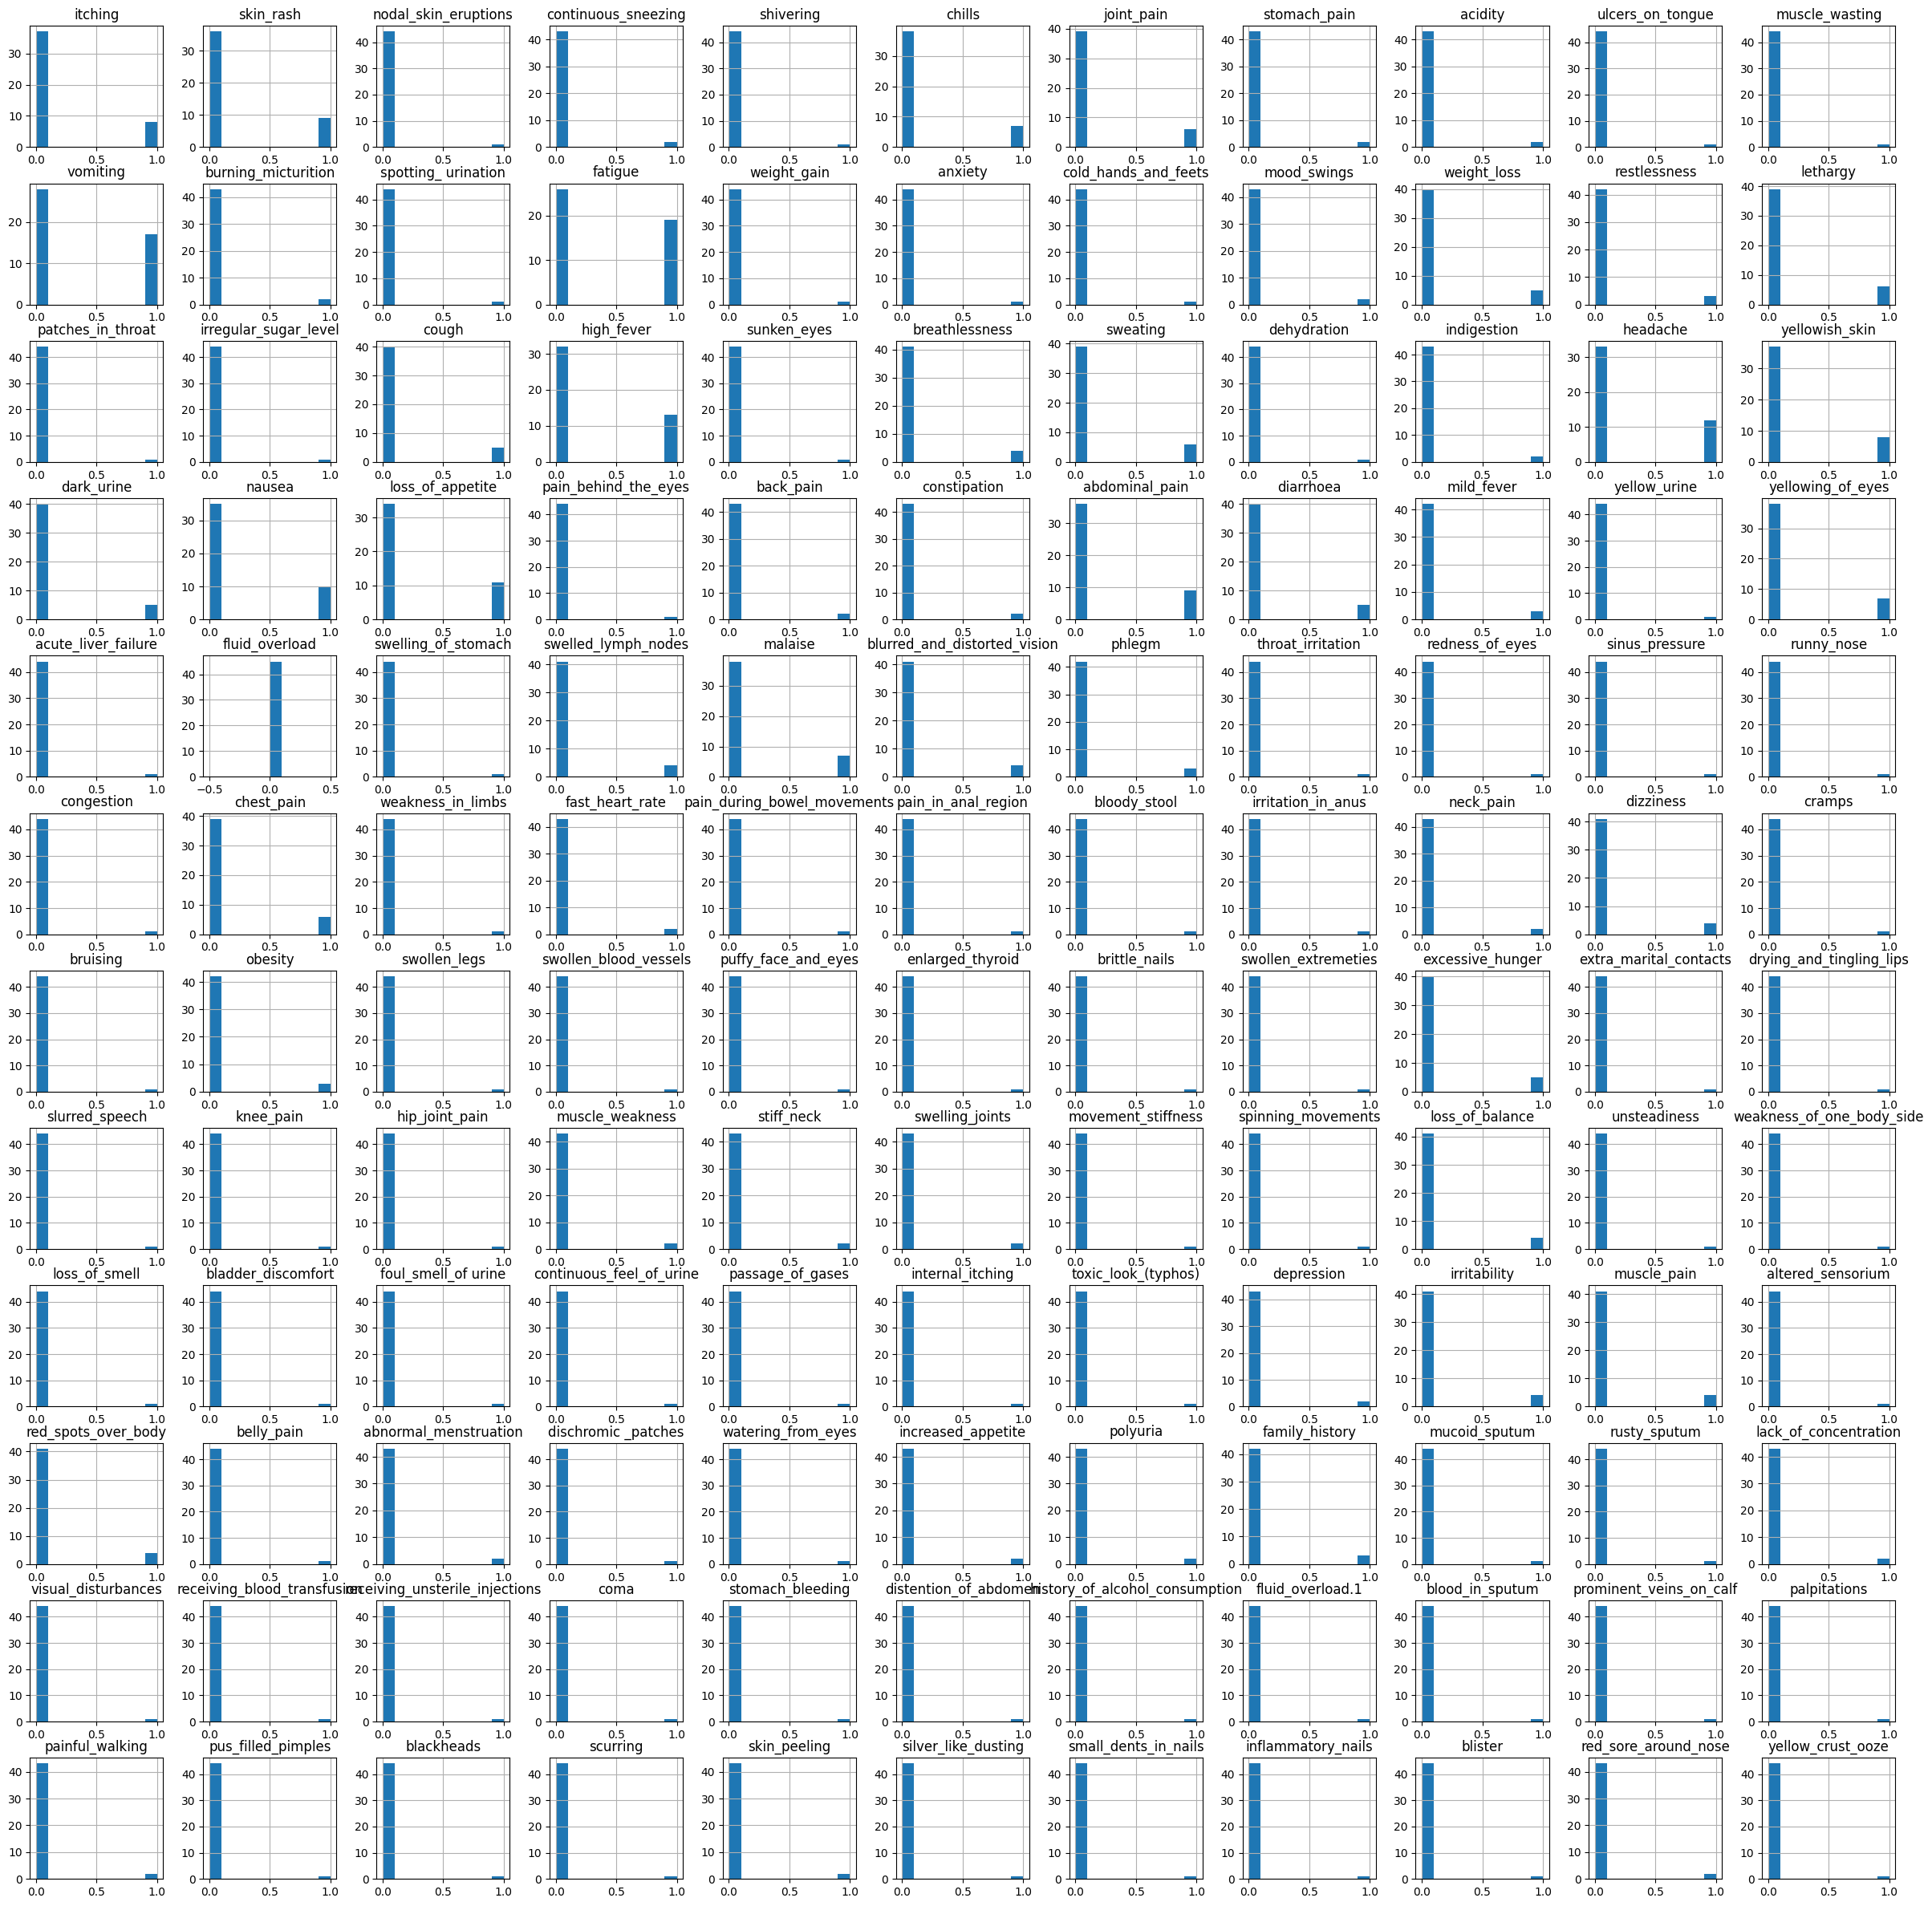

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=1.1, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)


test_data.hist(bins=10, figsize=(30,30))
plt.show()

In [100]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

test_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

## Explotary Data Analysis (EDA) for testing data

In [101]:

test_data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   
42        0          0                     0                    0          0   
43        0          0                     0                    0          0   
44        1          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0        0           0             0        0                 0   
1        1           0             0        0                 0   
2        0           0             1        1                 1   
3        0           0             0        0          

In [102]:
#cheching the null  values of test dataset

In [103]:
test_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [104]:


# Remove the unnecessary columns

In [105]:
columns_to_drop = ['itching','stomach_pain', 'lethargy', 'sweating', 'abdominal_pain', 'continuous_sneezing', 'shivering', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
                   'constipation', 'belly_pain', 'watering_from_eyes', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
                   'nodal_skin_eruptions', 'continuous_sneezing', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',                 
                  'mood_swings', 'weight_loss', 'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'sunken_eyes', 'breathlessness', 'dehydration', 'indigestion', 'yellowish_skin',                         
                  'dark_urine', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region',
                  'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',                         
                  'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
                  'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',                       
                  'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
                  'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',                        
                  'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',                                
                  'red_sore_around_nose', 'yellow_crust_ooze', 'dischromic _patches', 'diarrhoea', 'mild_fever', 'swelled_lymph_nodes', 'toxic_look_(typhos)']


test_data.drop(columns=columns_to_drop, inplace=True)



In [106]:
testing_prepared_dataset_new_pd =test_data
testing_prepared_dataset_new_pd

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0           1       0           0         0       0                 0   
1           0       1           0         0       0                 0   
2           0       0           0         0       0                 0   
3           0       0           0         0       1                 1   
4           1       0           0         0       0                 0   
5           0       0           0         0       0                 1   
6           0       0           1         0       0                 0   
7           0       0           0         0       0                 0   
8           0       0           0         0       0                 0   
9           0       0           1         0       0                 0   
10          0       0           0         1       0                 0   
11          0       0           0         1       0                 0   
12          0       0           0         0       0                 0   
13          0       0           0         1       0                 0   
14          0       0           1         0       0                 0   
15          0       1           1         1       1                 0   
16          1       0           1         1       0                 1   
17          1       1           1         1       1                 1   
18          0       1           1         1       1                 0   
19          0       0           0         0       1                 1   
20          0       0           0         0       0                 1   
21          0       0           0         0       1                 1   
22          0       0           0         0       1                 1   
23          0       0           1         0       1                 1   
24          0       0           0         0       0                 0   
25          0       1           1         0       0                 1   
26          0       1           1         1       0                 0   
27          0       1           1         0       0                 0   
28          0       0           0         0       0                 0   
29          0       0           0         0       0                 0   
30          0       0           0         0       0                 0   
31          0       0           0         0       0                 0   
32          0       0           0         0       0                 0   
33          0       0           0         1       1                 0   
34          0       0           0         0       0                 0   
35          0       0           0         0       0                 0   
36          0       0           0         1       1                 0   
37          1       0           0         0       0                 0   
38          0       0           0         0       0                 0   
39          1       0           0         0       0                 0   
40          1       0           1         0       0                 0   
41          1       0           0         0       0                 0   
42          0       0           0         0       0                 0   
43          0       0           0         1       0                 0   
44          1       0           1         1       0                 1   

    pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  
0                      0          0        0            0                    0  
1                      0          0        0            0                    0  
2                      0          0        0            0                    0  
3                      0          0        0            0                    0  
4                      0          0        0            0                    0  
5                      0          0        0            0                    0  
6                      0          0        0            0                    0

In [107]:
# check the null values again

In [108]:
testing_prepared_dataset_new_pd.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
dtype: int64

In [109]:
testing_prepared_dataset_new_pd

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0           1       0           0         0       0                 0   
1           0       1           0         0       0                 0   
2           0       0           0         0       0                 0   
3           0       0           0         0       1                 1   
4           1       0           0         0       0                 0   
5           0       0           0         0       0                 1   
6           0       0           1         0       0                 0   
7           0       0           0         0       0                 0   
8           0       0           0         0       0                 0   
9           0       0           1         0       0                 0   
10          0       0           0         1       0                 0   
11          0       0           0         1       0                 0   
12          0       0           0         0       0                 0   
13          0       0           0         1       0                 0   
14          0       0           1         0       0                 0   
15          0       1           1         1       1                 0   
16          1       0           1         1       0                 1   
17          1       1           1         1       1                 1   
18          0       1           1         1       1                 0   
19          0       0           0         0       1                 1   
20          0       0           0         0       0                 1   
21          0       0           0         0       1                 1   
22          0       0           0         0       1                 1   
23          0       0           1         0       1                 1   
24          0       0           0         0       0                 0   
25          0       1           1         0       0                 1   
26          0       1           1         1       0                 0   
27          0       1           1         0       0                 0   
28          0       0           0         0       0                 0   
29          0       0           0         0       0                 0   
30          0       0           0         0       0                 0   
31          0       0           0         0       0                 0   
32          0       0           0         0       0                 0   
33          0       0           0         1       1                 0   
34          0       0           0         0       0                 0   
35          0       0           0         0       0                 0   
36          0       0           0         1       1                 0   
37          1       0           0         0       0                 0   
38          0       0           0         0       0                 0   
39          1       0           0         0       0                 0   
40          1       0           1         0       0                 0   
41          1       0           0         0       0                 0   
42          0       0           0         0       0                 0   
43          0       0           0         1       0                 0   
44          1       0           1         1       0                 1   

    pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  
0                      0          0        0            0                    0  
1                      0          0        0            0                    0  
2                      0          0        0            0                    0  
3                      0          0        0            0                    0  
4                      0          0        0            0                    0  
5                      0          0        0            0                    0  
6                      0          0        0            0                    0

skin_rash               0
nodal_skin_             0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
lethargy                0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
constipation            0
abdominal_pain          0
diarrhoea               0
mild_fever              0
swelled_lymph_nodes     0
malaise                 0
toxic_look_(typhos)     0
muscle_pain             0
red_spots_over_body     0
belly_pain              0
dischromic _patches     0
watering_from_eyes      0
Temp                    0
dtype: int64

In [110]:
## save the newly created test data into the csv file

In [111]:
# # Save testing_set_pd dataset file
testing_prepared_dataset_new_pd.to_csv("testing_prepared_dataset_new_pd.csv", index=False)

print("test data file saved successfully.")

test data file saved successfully.


In [112]:
testing_set_new_dataset_pd_new = pd.read_csv("testing_prepared_dataset_new_pd.csv")

In [113]:
testing_set_new_dataset_pd_new

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0           1       0           0         0       0                 0   
1           0       1           0         0       0                 0   
2           0       0           0         0       0                 0   
3           0       0           0         0       1                 1   
4           1       0           0         0       0                 0   
5           0       0           0         0       0                 1   
6           0       0           1         0       0                 0   
7           0       0           0         0       0                 0   
8           0       0           0         0       0                 0   
9           0       0           1         0       0                 0   
10          0       0           0         1       0                 0   
11          0       0           0         1       0                 0   
12          0       0           0         0       0                 0   
13          0       0           0         1       0                 0   
14          0       0           1         0       0                 0   
15          0       1           1         1       1                 0   
16          1       0           1         1       0                 1   
17          1       1           1         1       1                 1   
18          0       1           1         1       1                 0   
19          0       0           0         0       1                 1   
20          0       0           0         0       0                 1   
21          0       0           0         0       1                 1   
22          0       0           0         0       1                 1   
23          0       0           1         0       1                 1   
24          0       0           0         0       0                 0   
25          0       1           1         0       0                 1   
26          0       1           1         1       0                 0   
27          0       1           1         0       0                 0   
28          0       0           0         0       0                 0   
29          0       0           0         0       0                 0   
30          0       0           0         0       0                 0   
31          0       0           0         0       0                 0   
32          0       0           0         0       0                 0   
33          0       0           0         1       1                 0   
34          0       0           0         0       0                 0   
35          0       0           0         0       0                 0   
36          0       0           0         1       1                 0   
37          1       0           0         0       0                 0   
38          0       0           0         0       0                 0   
39          1       0           0         0       0                 0   
40          1       0           1         0       0                 0   
41          1       0           0         0       0                 0   
42          0       0           0         0       0                 0   
43          0       0           0         1       0                 0   
44          1       0           1         1       0                 1   

    pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  
0                      0          0        0            0                    0  
1                      0          0        0            0                    0  
2                      0          0        0            0                    0  
3                      0          0        0            0                    0  
4                      0          0        0            0                    0  
5                      0          0        0            0                    0  
6                      0          0        0            0                    0

In [114]:
# Extract the symptoms columns from the testing dataset
test_symptoms_column = testing_set_new_dataset_pd_new[["skin_rash","chills","high_fever",
                                                      "headache", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "malaise", 
                                                     "muscle_pain", "red_spots_over_body"]]


# Predictions on the test set
test_set_predictions =  dt_clf.predict(testing_set_new_dataset_pd_new)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "skin_rash": test_symptoms_column.iloc[:, 0],  # Assuming itching is the first symptom column
    "chills": test_symptoms_column.iloc[:, 1],  # Assuming skin_rash is the second symptom column
    "high_fever": test_symptoms_column.iloc[:, 2],
    "headache": test_symptoms_column.iloc[:, 3],
    "nausea": test_symptoms_column.iloc[:, 4],
    "loss_of_appetite": test_symptoms_column.iloc[:, 5],
    "pain_behind_the_eyes": test_symptoms_column.iloc[:, 6],
    "back_pain": test_symptoms_column.iloc[:, 7],
    "malaise": test_symptoms_column.iloc[:, 8],
    "muscle_pain": test_symptoms_column.iloc[:, 9],
    "red_spots_over_body": test_symptoms_column.iloc[:, 10],
    
    # Repeat this for the other symptom columns
    "Prognosis": test_set_predictions
})

# Save submission DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)
print(submission_df.head(116))


    skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0           1       0           0         0       0                 0   
1           0       1           0         0       0                 0   
2           0       0           0         0       0                 0   
3           0       0           0         0       1                 1   
4           1       0           0         0       0                 0   
5           0       0           0         0       0                 1   
6           0       0           1         0       0                 0   
7           0       0           0         0       0                 0   
8           0       0           0         0       0                 0   
9           0       0           1         0       0                 0   
10          0       0           0         1       0                 0   
11          0       0           0         1       0                 0   
12          0       0           0         0       0

In [115]:
#0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0
# 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
# 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1
# 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

pred = dt_clf.predict([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]])



if pred[0] == 0:
  print("Dengue is not infected")
else:
  print("Dengue is infected")

Dengue is not infected


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [116]:
# Import the pickle file

# create pikel file
import pickle

pickle.dump(logreg_model, open('./DengueDetectionModel.h5', 'wb'))